In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/ship_fuel_efficiency.csv')
df.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ship_id             1440 non-null   object 
 1   ship_type           1440 non-null   object 
 2   route_id            1440 non-null   object 
 3   month               1440 non-null   object 
 4   distance            1440 non-null   float64
 5   fuel_type           1440 non-null   object 
 6   fuel_consumption    1440 non-null   float64
 7   CO2_emissions       1440 non-null   float64
 8   weather_conditions  1440 non-null   object 
 9   engine_efficiency   1440 non-null   float64
dtypes: float64(4), object(6)
memory usage: 112.6+ KB


In [4]:
df.isnull().sum()

ship_id               0
ship_type             0
route_id              0
month                 0
distance              0
fuel_type             0
fuel_consumption      0
CO2_emissions         0
weather_conditions    0
engine_efficiency     0
dtype: int64

In [5]:
df.duplicated().sum()

0

## EDA & Feature Engineering

### EDA - Categorical vs Categorical

In [6]:
def unique_counts_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Count unique values in each categorical column of a DataFrame
    """

    unique_info = []
    for col in df.select_dtypes(['object']).columns:
        unique_count = df[col].nunique()
        unique_values = df[col].unique()
        unique_info.append({
            'column': col,
            'unique_count': unique_count,
            'unique_values': unique_values
        })
     
    return pd.DataFrame(unique_info)

In [7]:
unique_df = unique_counts_values(df)
unique_df.head()

,column,unique_count,unique_values
0,ship_id,120,"[NG001, NG002, NG003, NG004, NG005, NG006, NG0..."
1,ship_type,4,"[Oil Service Boat, Fishing Trawler, Surfer Boa..."
2,route_id,4,"[Warri-Bonny, Port Harcourt-Lagos, Lagos-Apapa..."
3,month,12,"[January, February, March, April, May, June, J..."
4,fuel_type,2,"[HFO, Diesel]"


In [8]:
unique_df

,column,unique_count,unique_values
0,ship_id,120,"[NG001, NG002, NG003, NG004, NG005, NG006, NG0..."
1,ship_type,4,"[Oil Service Boat, Fishing Trawler, Surfer Boa..."
2,route_id,4,"[Warri-Bonny, Port Harcourt-Lagos, Lagos-Apapa..."
3,month,12,"[January, February, March, April, May, June, J..."
4,fuel_type,2,"[HFO, Diesel]"
5,weather_conditions,3,"[Stormy, Moderate, Calm]"


now lets do plotting

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

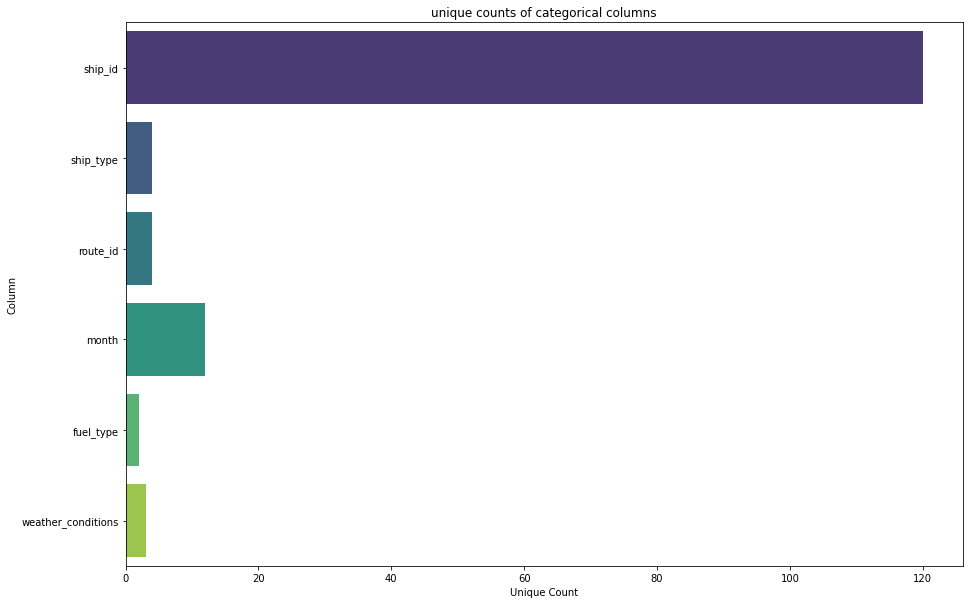

In [10]:
def plot_unique_counts(unique_df: pd.DataFrame) -> None:
    """
    Plot unique counts of categorical columns in a DataFrame
    """

    plt.figure(figsize=(15, 10))
    sns.barplot(x='unique_count', y='column', data=unique_df, palette='viridis')
    plt.title('unique counts of categorical columns')
    plt.xlabel('Unique Count')
    plt.ylabel('Column')
    plt.show()

plot_unique_counts(unique_df)


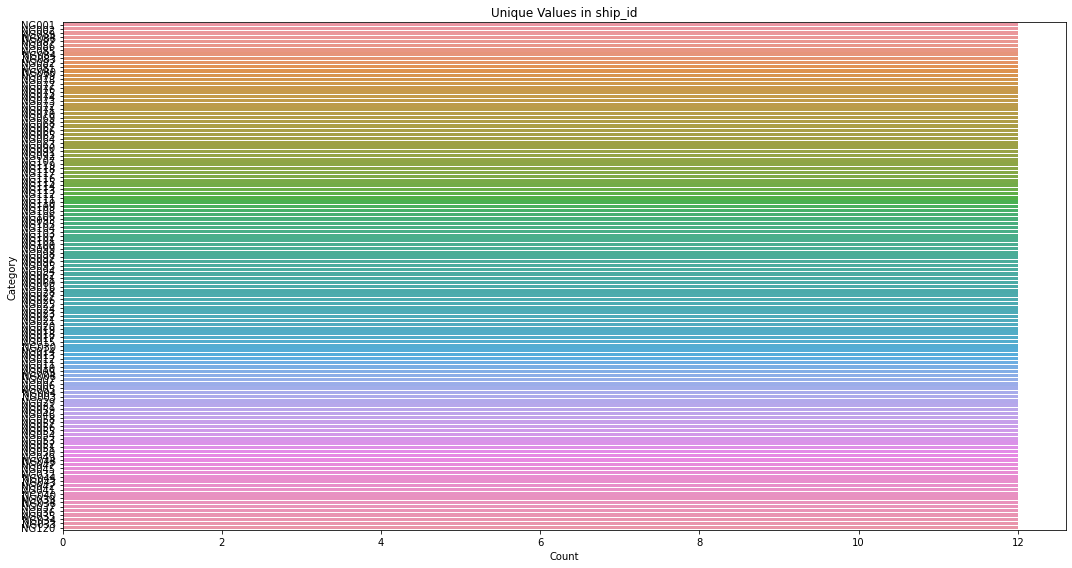

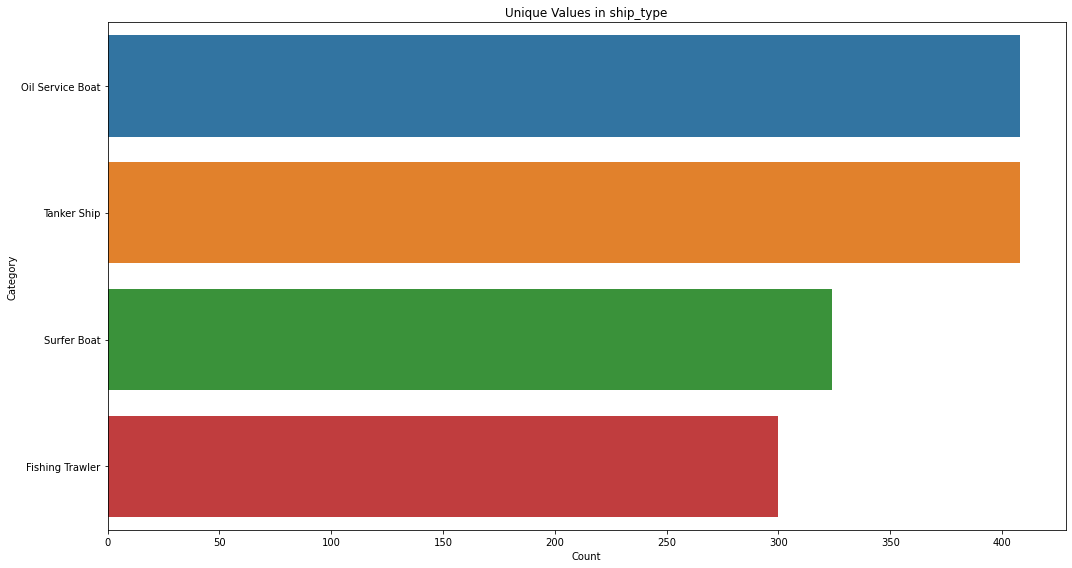

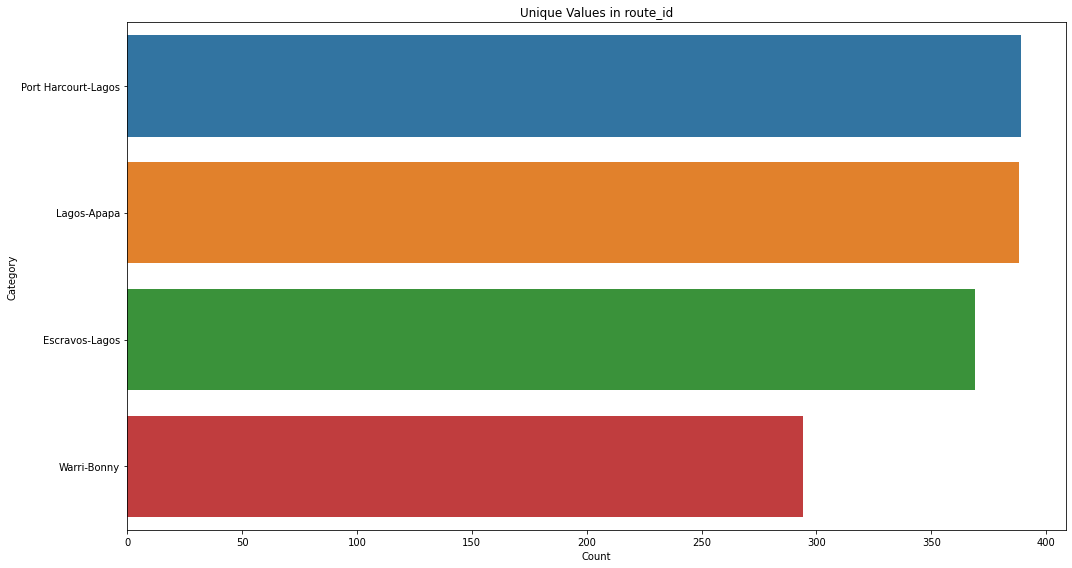

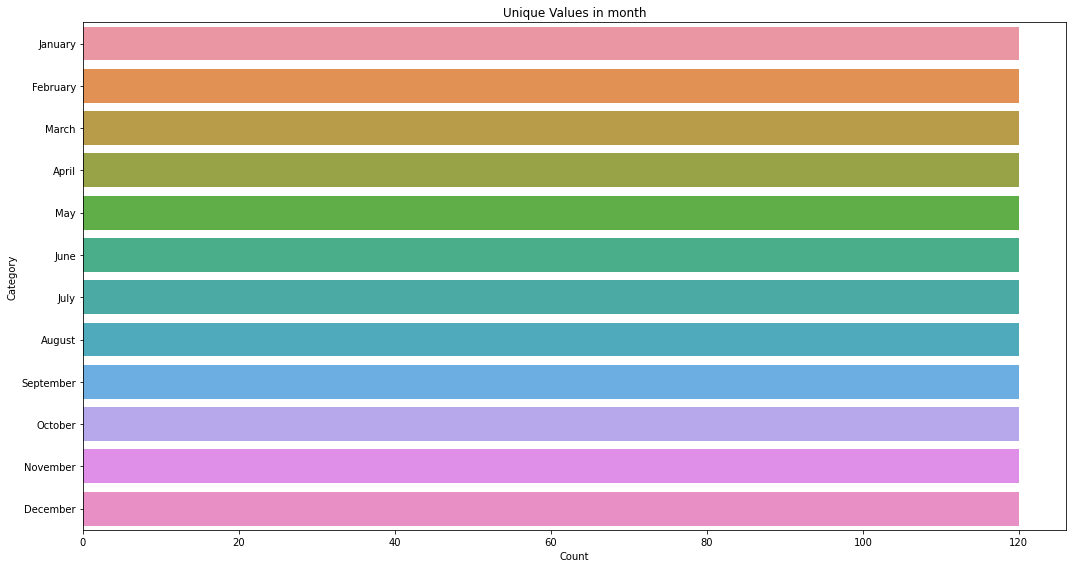

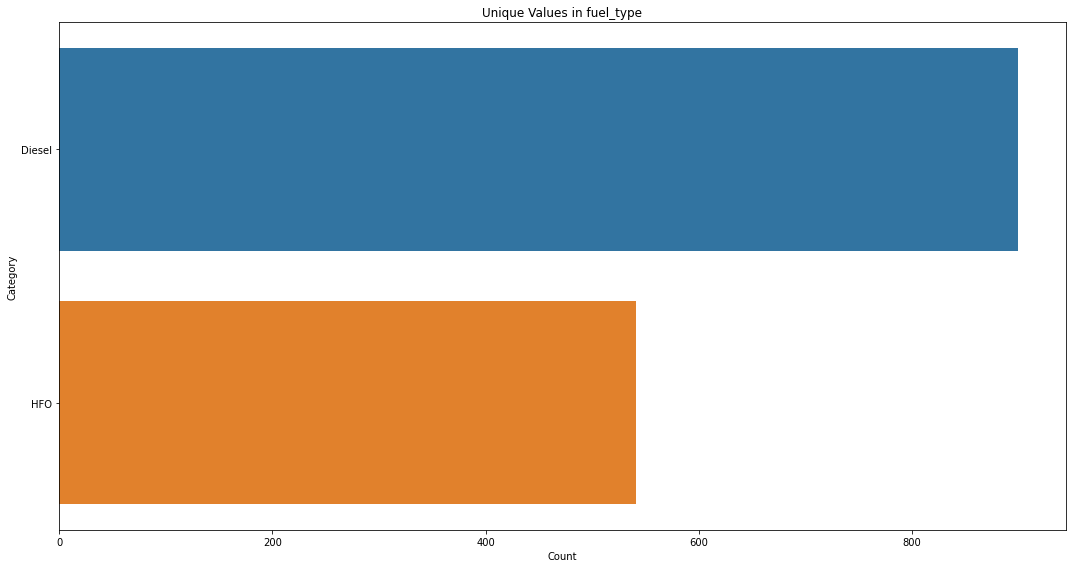

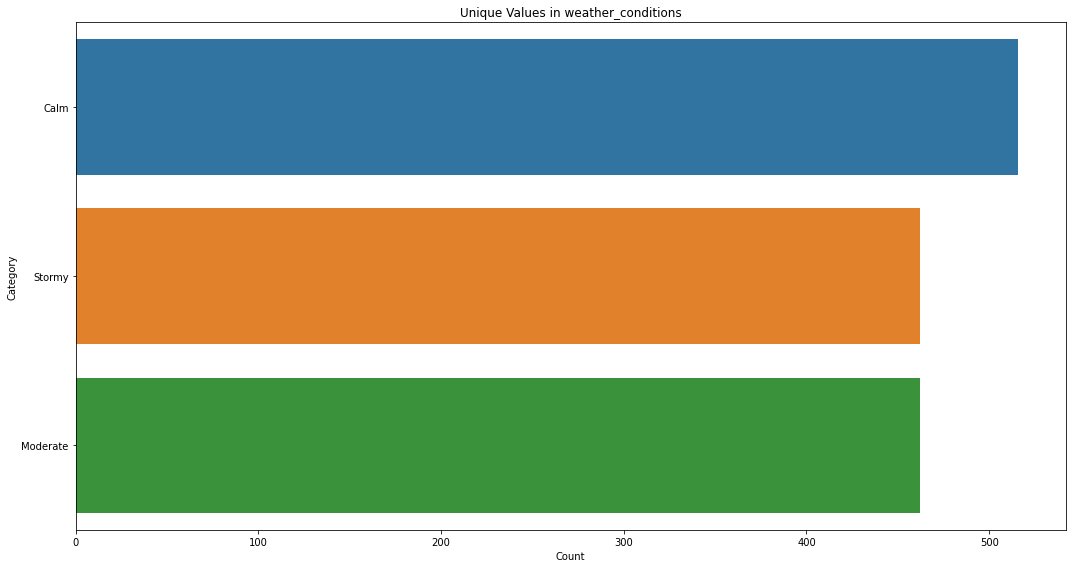

In [11]:
def plot_each_column(df: pd.DataFrame) -> None:
    """Plot count plots for each categorical column in the DataFrame"""
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for col in categorical_columns:
        plt.figure(figsize=(15, 8))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Unique Values in {col}')
        plt.ylabel('Category')
        plt.xlabel('Count')
        plt.tight_layout()
        plt.show()

plot_each_column(df)

In [12]:
unique_df.column

0               ship_id
1             ship_type
2              route_id
3                 month
4             fuel_type
5    weather_conditions
Name: column, dtype: object

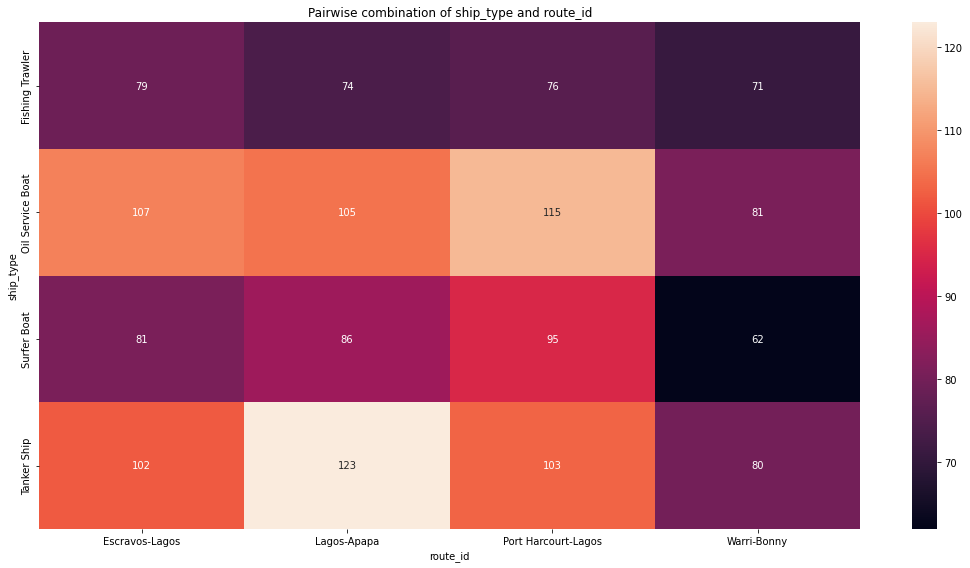

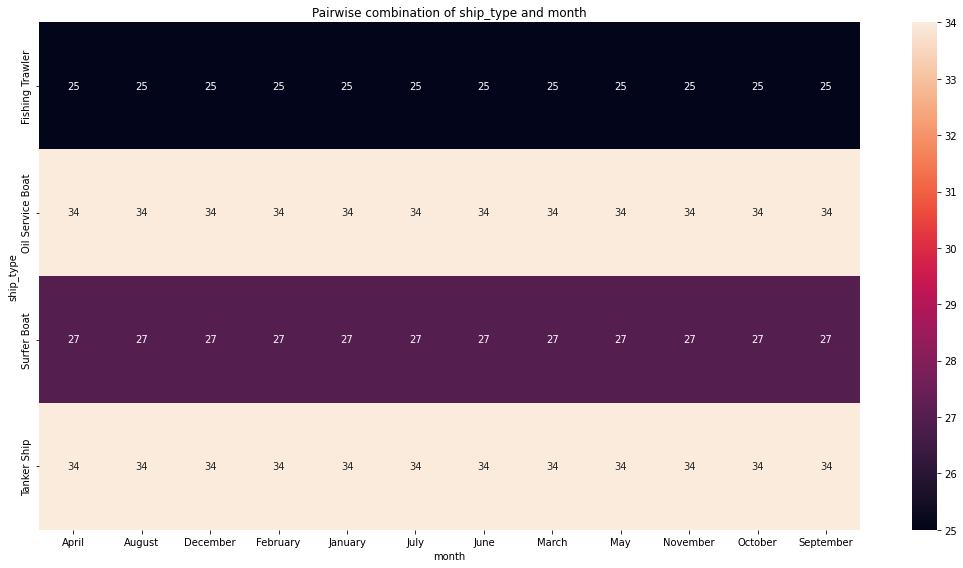

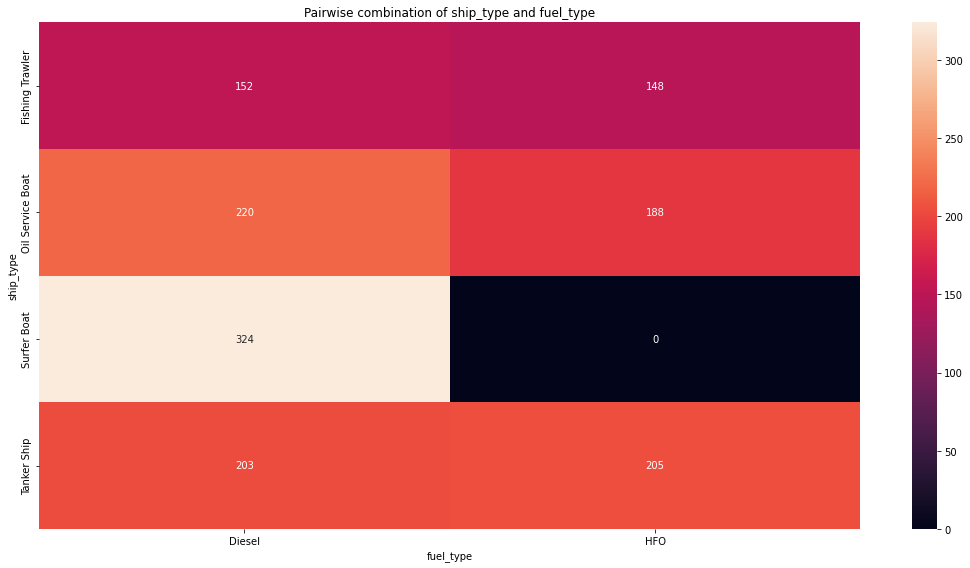

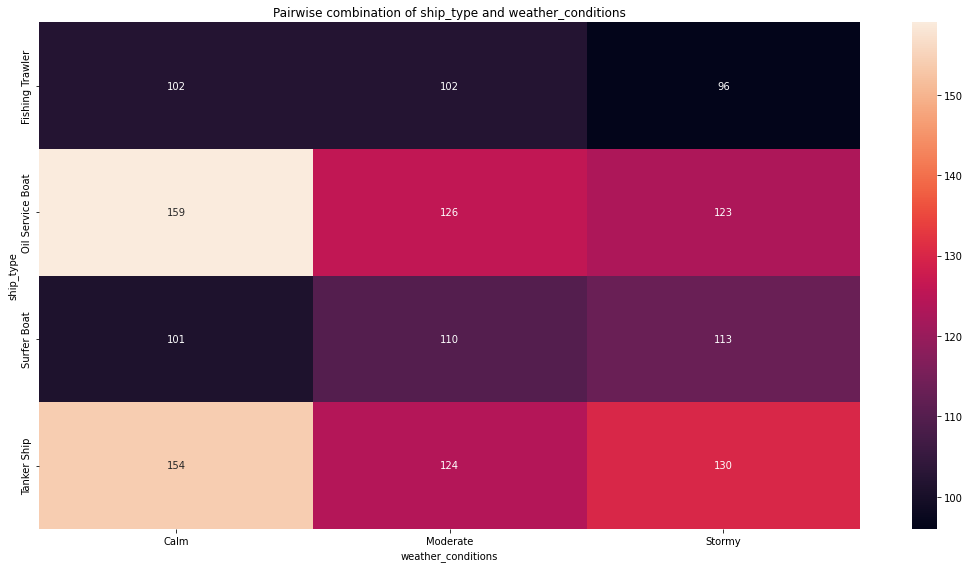

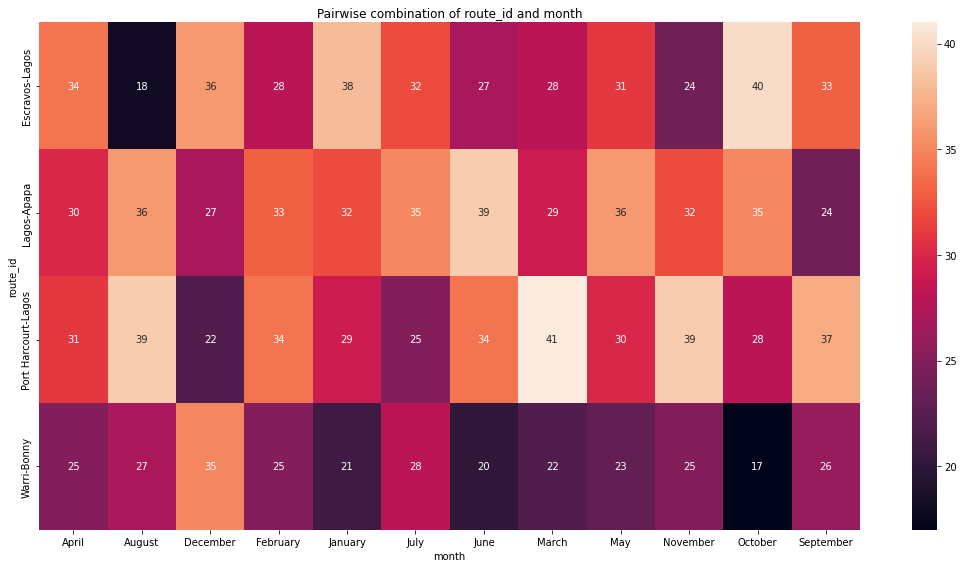

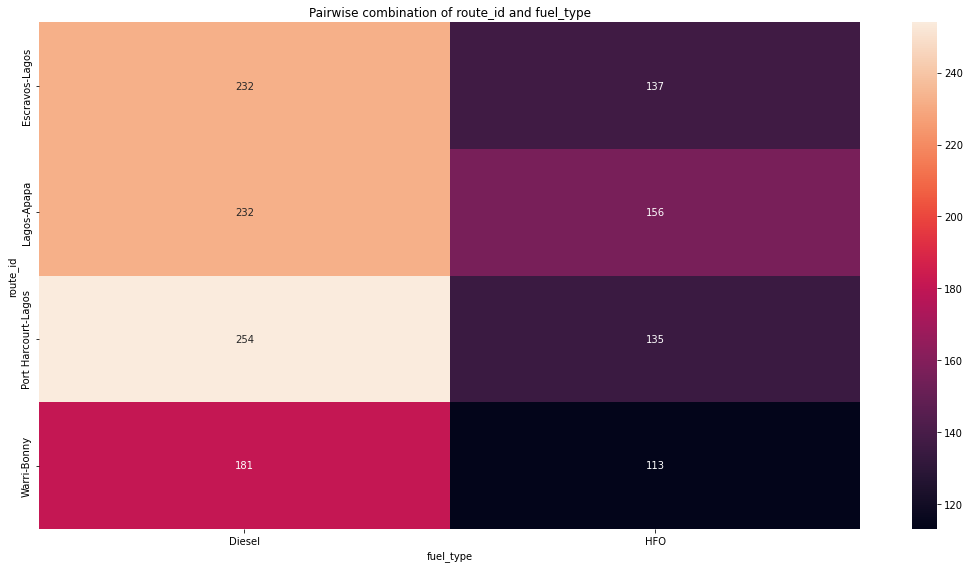

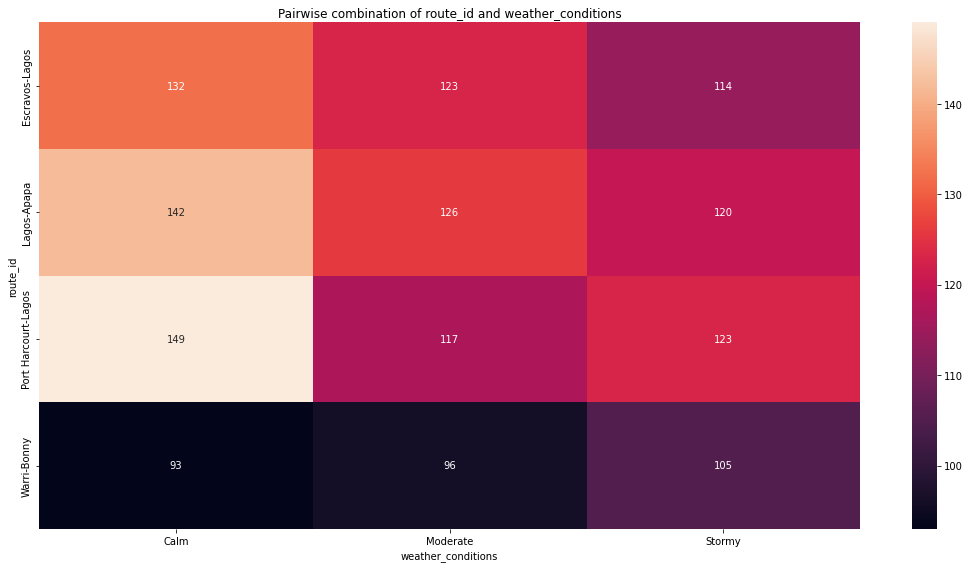

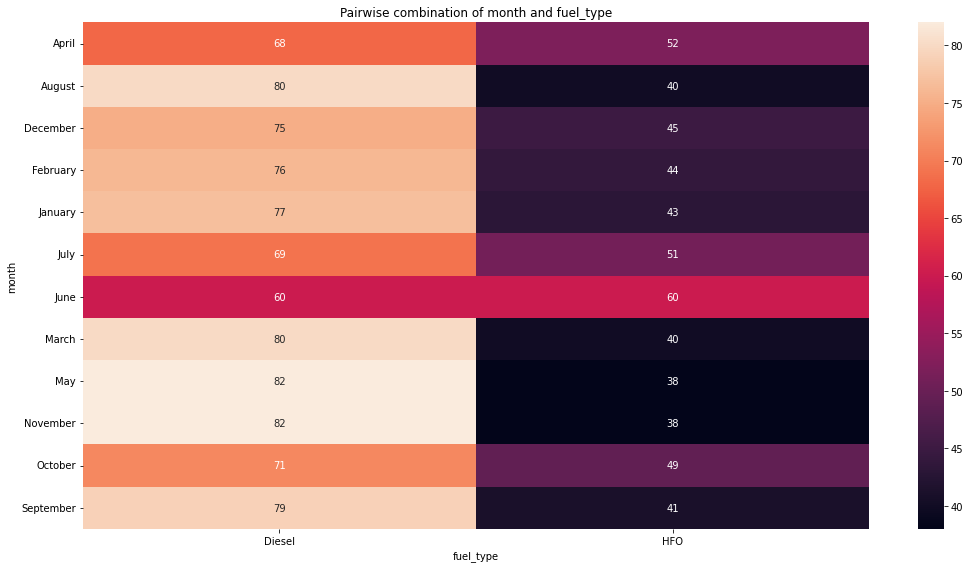

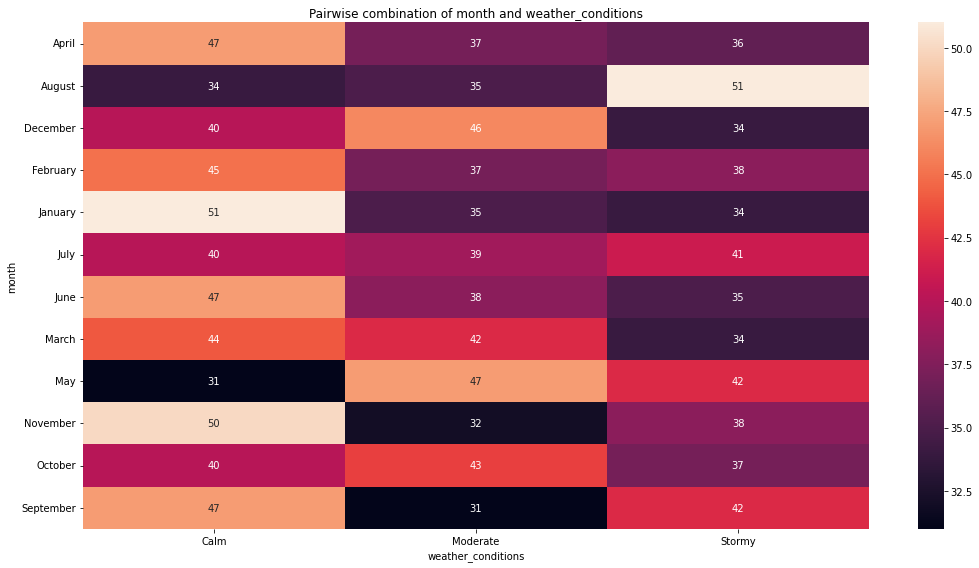

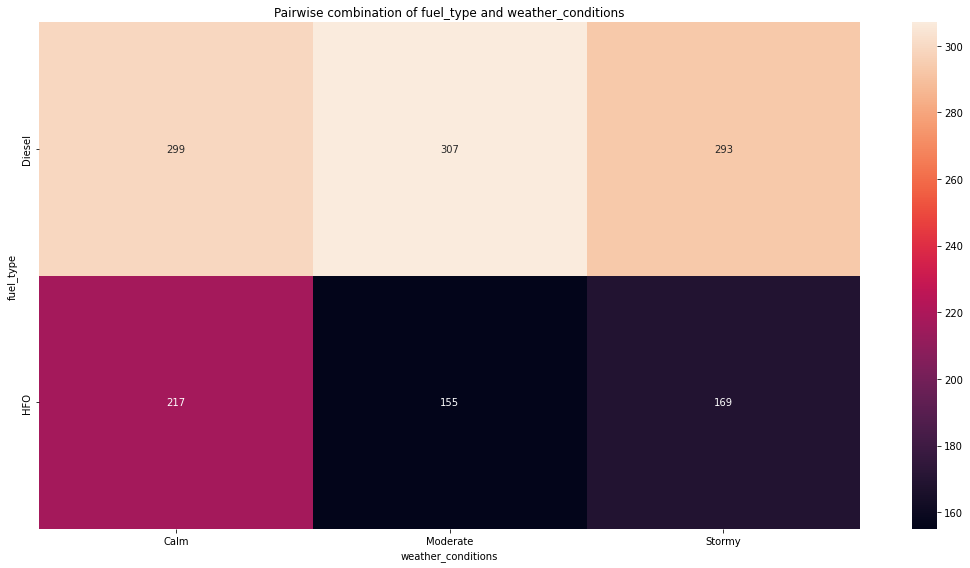

In [13]:
from itertools import combinations

def plot_pairwise_combinations(df: pd.DataFrame) -> None:
    """
    Plot pairwise combinations of categorical columns in the DataFrame
    """

    cat_columns = df.select_dtypes(include=['object']).columns.drop('ship_id') # exclude 'ship_id'
    for col1, col2 in combinations(cat_columns, 2):
        plt.figure(figsize=(15, 8))
        sns.heatmap(pd.crosstab(df[col1], df[col2]), annot=True, fmt='d')
        plt.title(f'Pairwise combination of {col1} and {col2}')
        plt.xlabel(col2)
        plt.ylabel(col1)
        plt.tight_layout()
        plt.show()

plot_pairwise_combinations(df)

### EDA - Numerical vs Numerical

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ship_id             1440 non-null   object 
 1   ship_type           1440 non-null   object 
 2   route_id            1440 non-null   object 
 3   month               1440 non-null   object 
 4   distance            1440 non-null   float64
 5   fuel_type           1440 non-null   object 
 6   fuel_consumption    1440 non-null   float64
 7   CO2_emissions       1440 non-null   float64
 8   weather_conditions  1440 non-null   object 
 9   engine_efficiency   1440 non-null   float64
dtypes: float64(4), object(6)
memory usage: 112.6+ KB


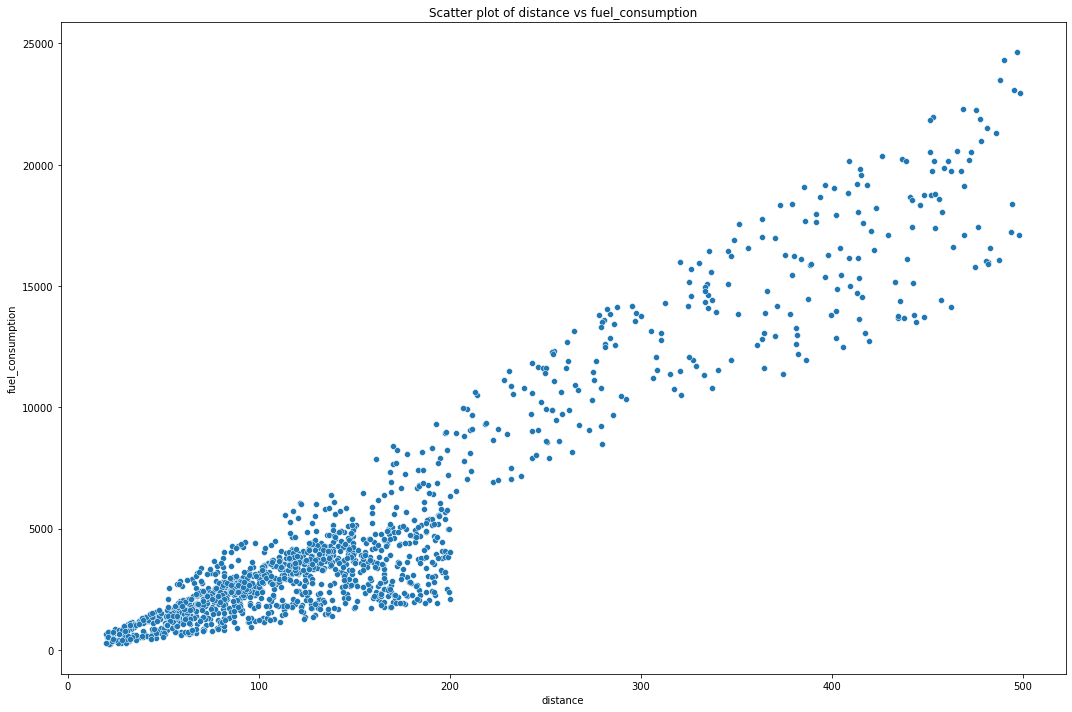

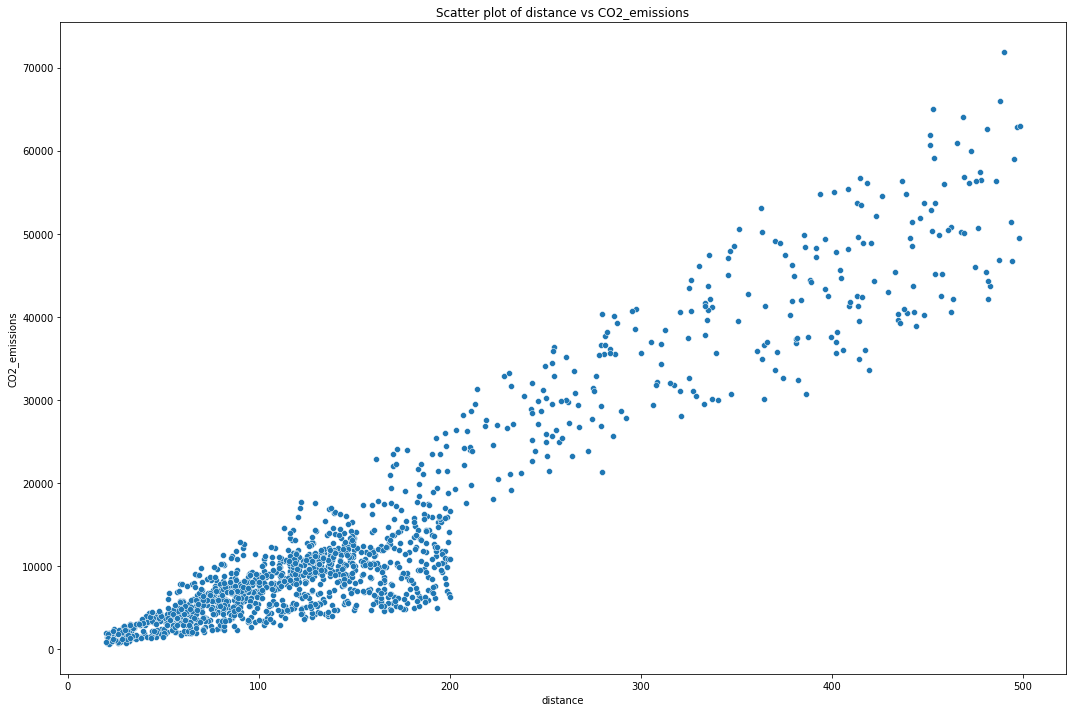

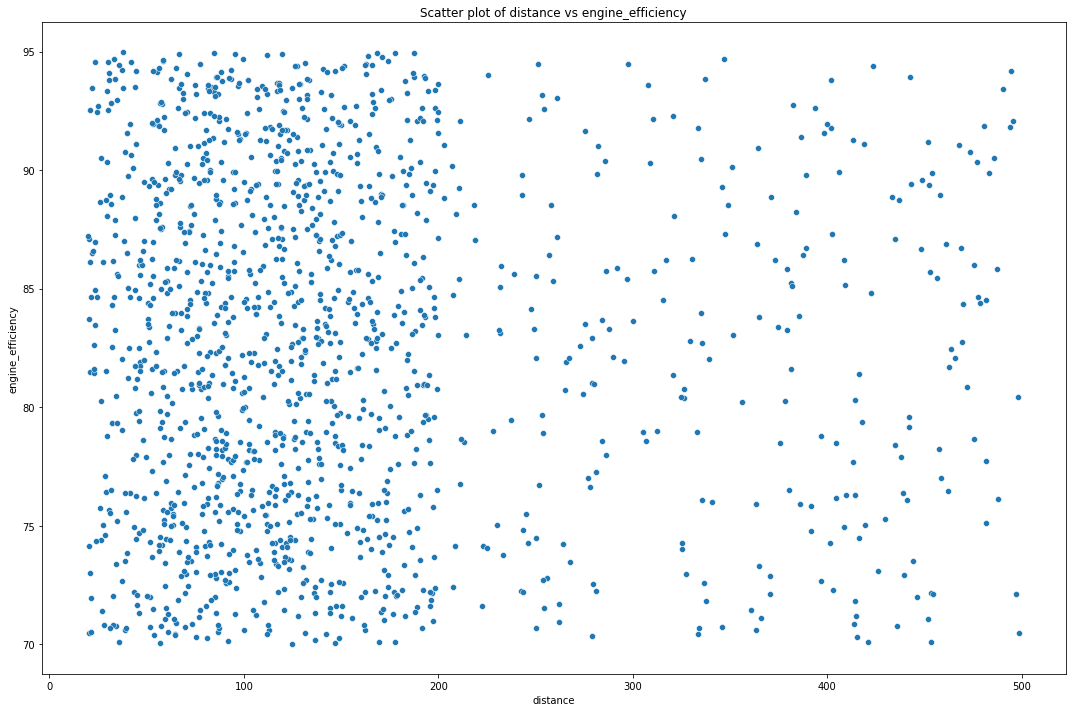

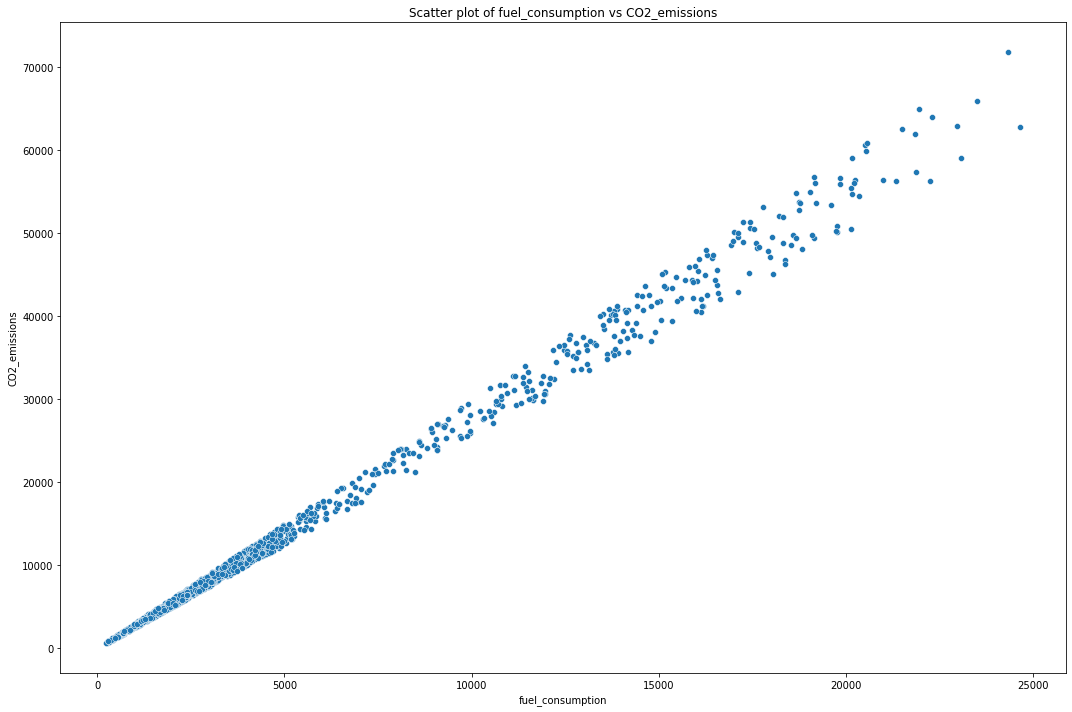

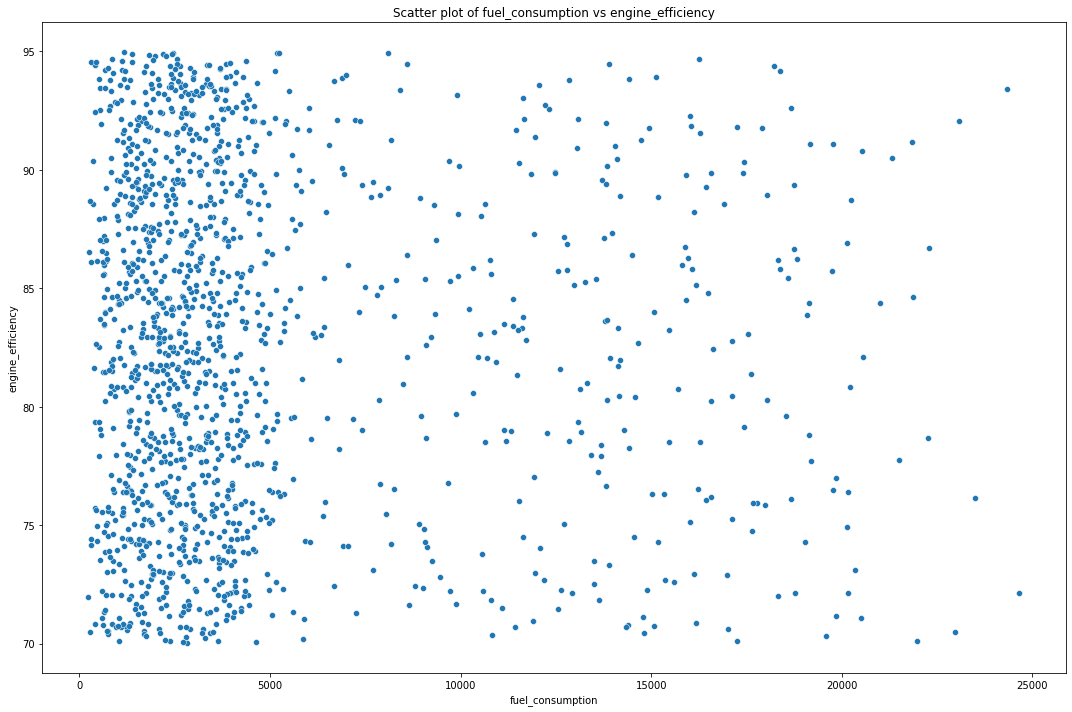

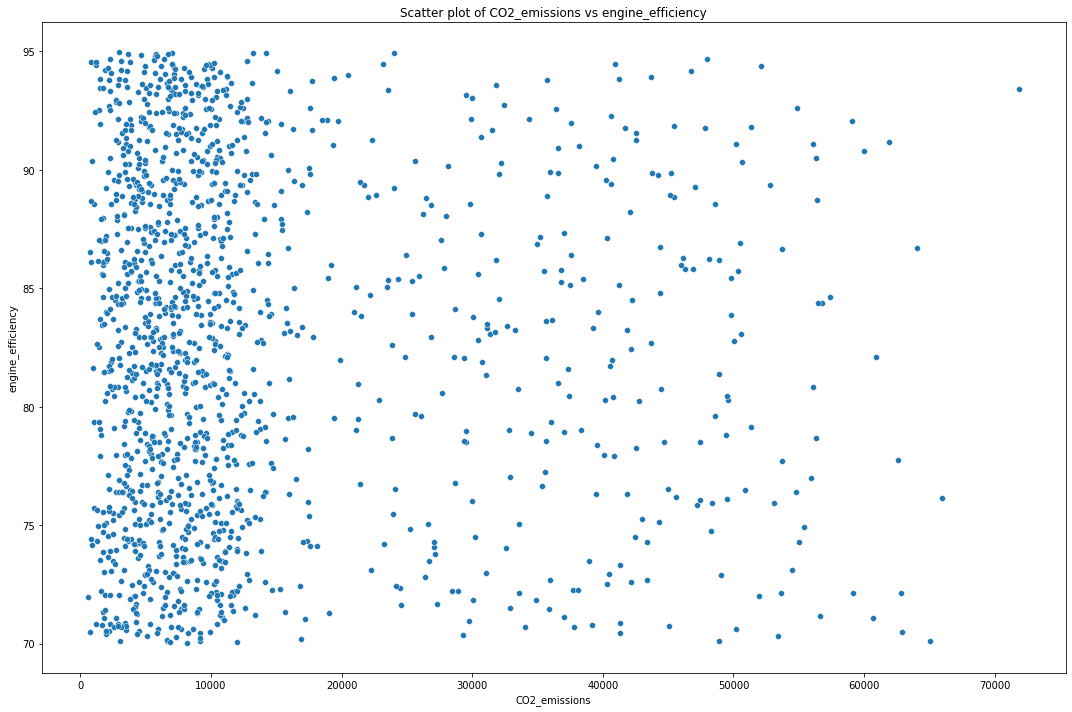

In [15]:
def plot_numerical_columns(df: pd.DataFrame) -> None:
    """
    plot numerical columns in the DataFrame
    """
    num_columns = df.select_dtypes(include=['float64']).columns
    for col1, col2 in combinations(num_columns, 2):
        plt.figure(figsize=(15, 10))
        sns.scatterplot(x=col1, y=col2, data=df)
        plt.title(f'Scatter plot of {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.tight_layout()
        plt.show()

plot_numerical_columns(df)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

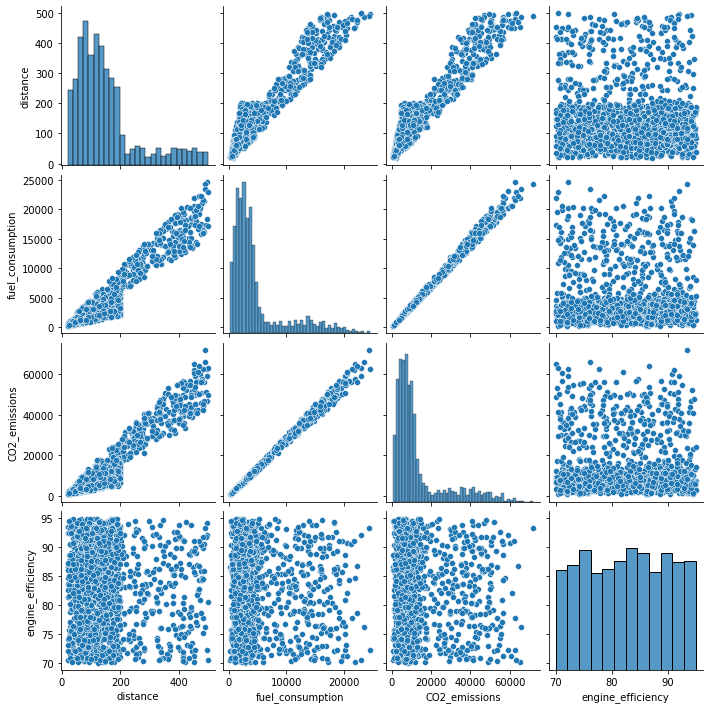

In [16]:
sns.pairplot(df.select_dtypes(include=['float64']))

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


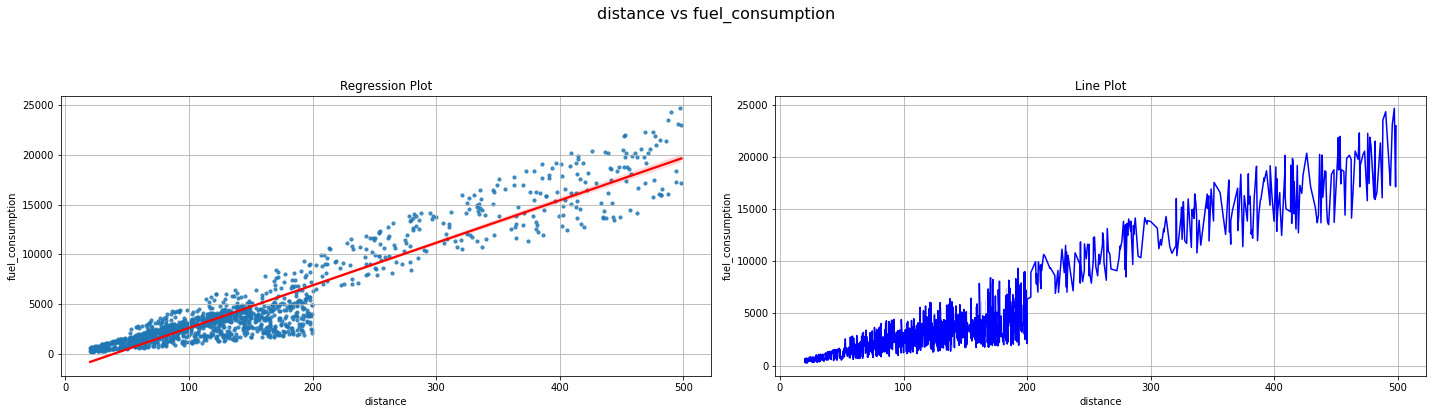

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


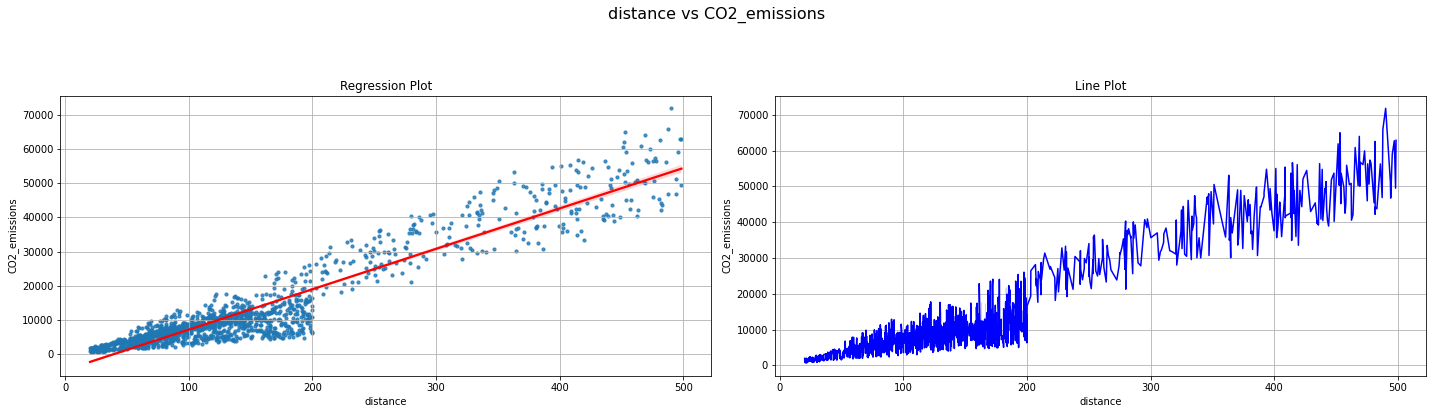

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


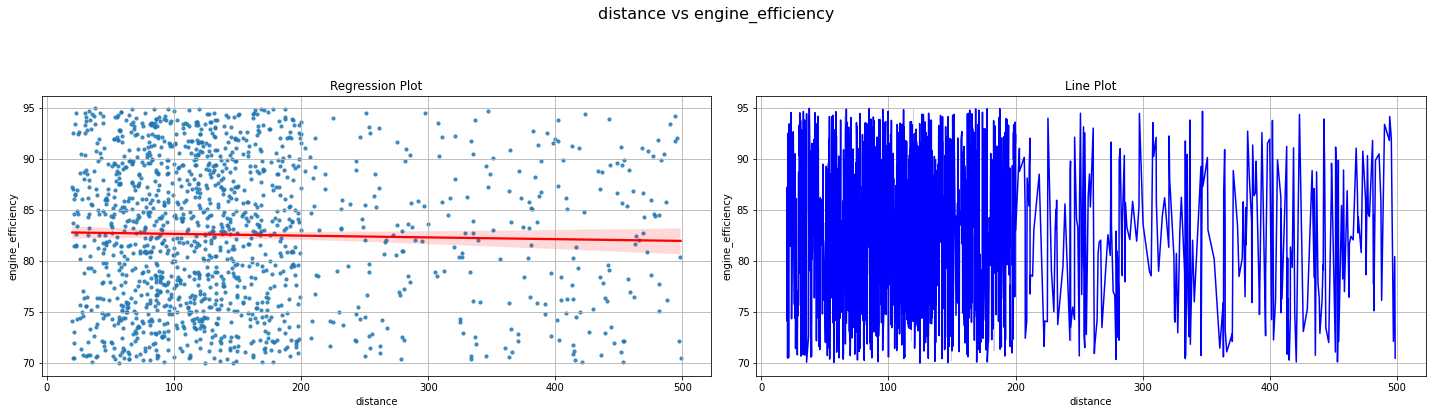

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


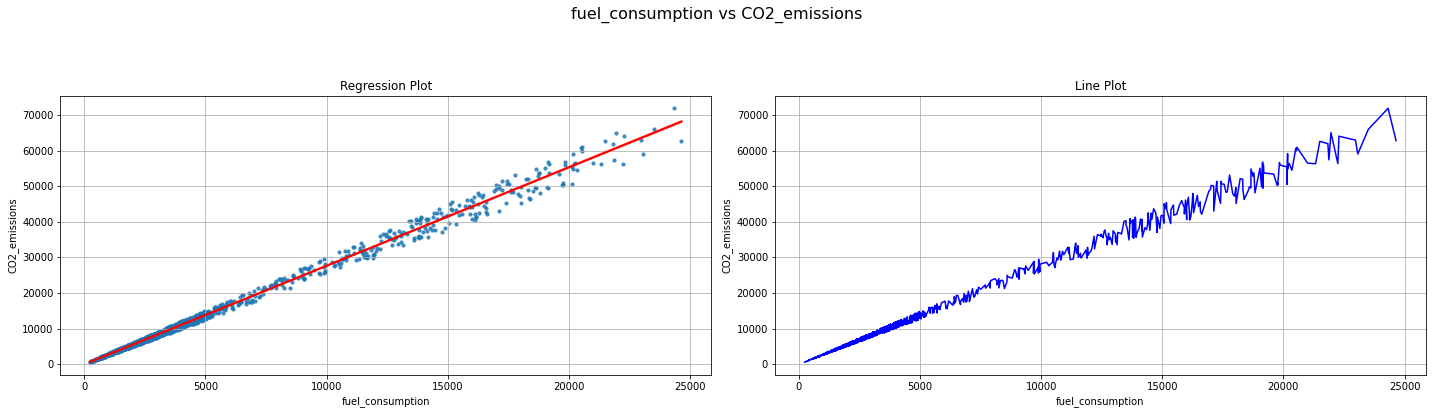

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


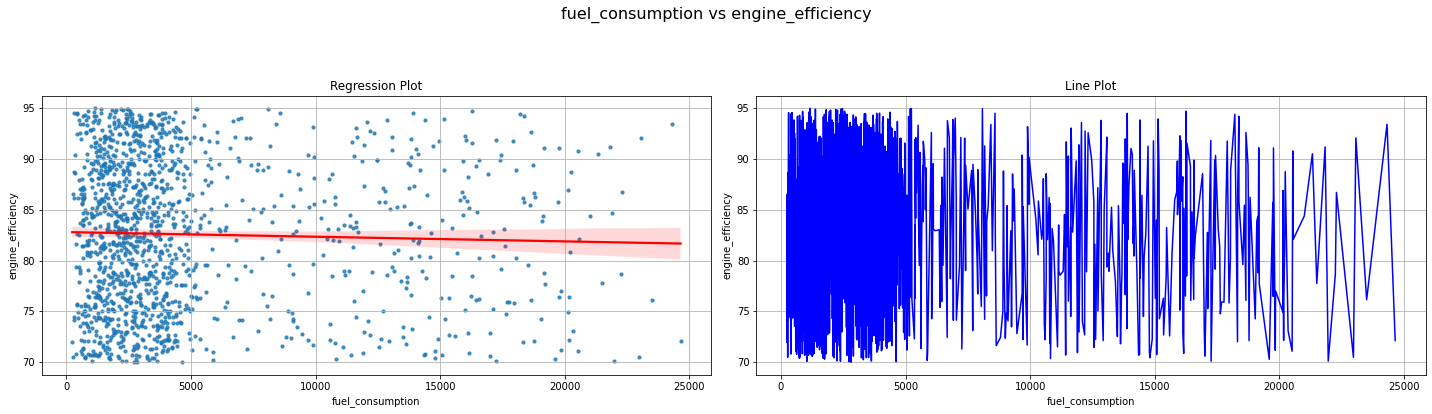

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


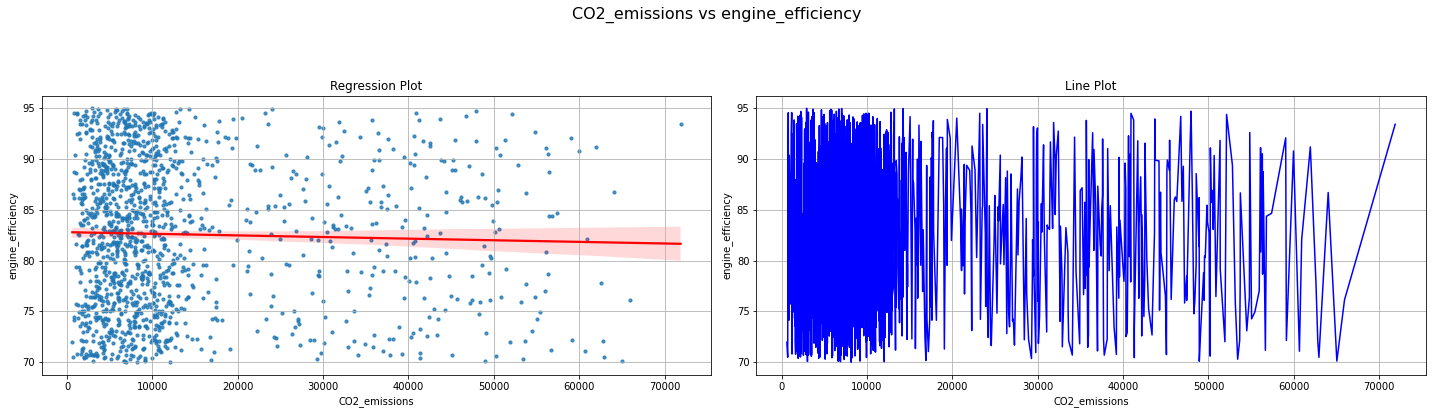

In [17]:
def plot_all_numerical_combinations(df: pd.DataFrame) -> None:
    """
    Plot all combinations of numerical columns.
    For each pair of numerical columns, plot:
    - regplot (trend line)
    - line plot
    All side-by-side in one figure.
    """
    num_columns = df.select_dtypes(include=['float64']).columns
    num_combinations = list(combinations(num_columns, 2))
    for col1, col2 in num_combinations:
        fig, axes = plt.subplots(1, 2, figsize=(20, 6))
        fig.suptitle(f'{col1} vs {col2}', fontsize=16)

        # regplot
        sns.regplot(x=df[col1], y=df[col2], ax=axes[0], scatter_kws={'s': 10}, line_kws={'color': 'red'})
        axes[0].set_title('Regression Plot')
        axes[0].set_xlabel(col1)
        axes[0].set_ylabel(col2)

        # Line Plot
        sns.lineplot(x=df[col1], y=df[col2], ax=axes[1], color='blue')
        axes[1].set_title('Line Plot')
        axes[1].set_xlabel(col1)
        axes[1].set_ylabel(col2)

        for ax in axes:
            ax.grid(True)
        plt.tight_layout(rect=[0, 0.03, 1, 0.90])
        plt.show()

plot_all_numerical_combinations(df)

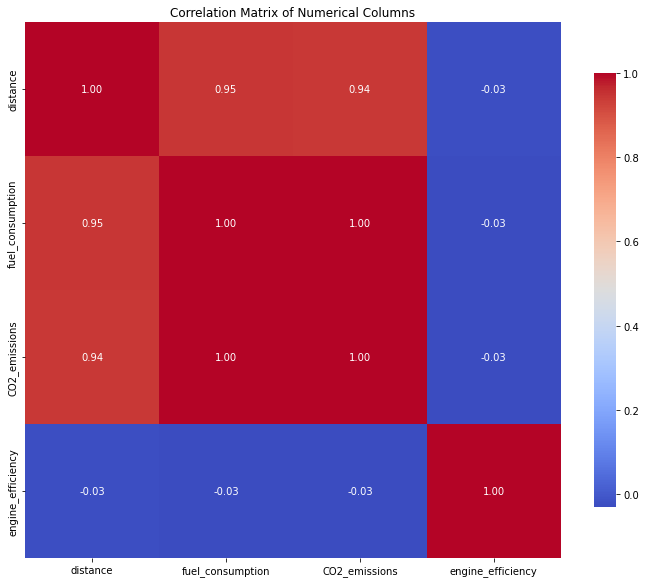

In [18]:
# correlation matrix
def plot_correlation_matrix(df: pd.DataFrame) -> None:
    """
    Plot the correlation matrix of numerical columns
    """

    corr = df.select_dtypes(include=['float64']).corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
    plt.title('Correlation Matrix of Numerical Columns')
    plt.show()

plot_correlation_matrix(df)

### EDA Categorical - Two Targets

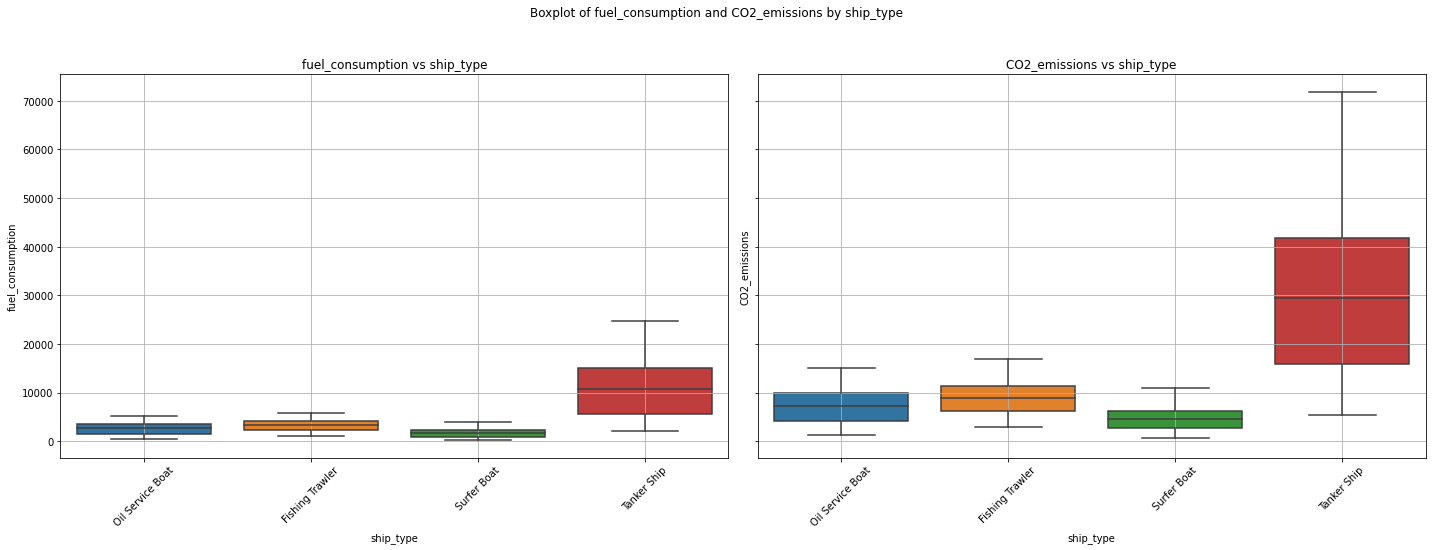

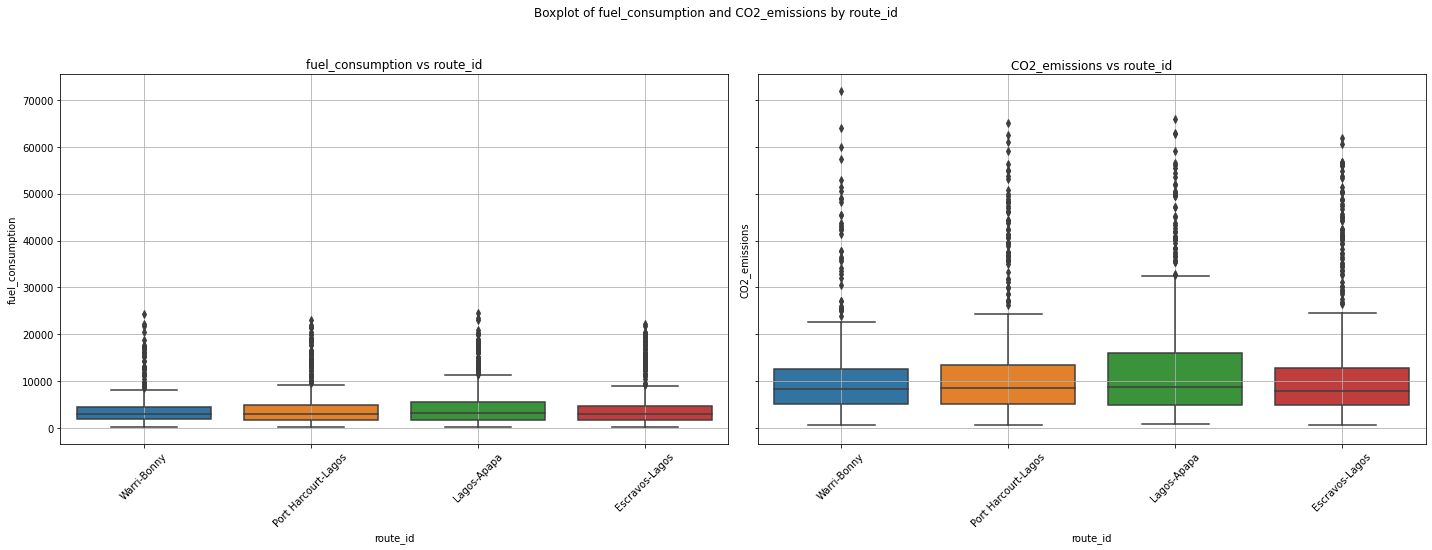

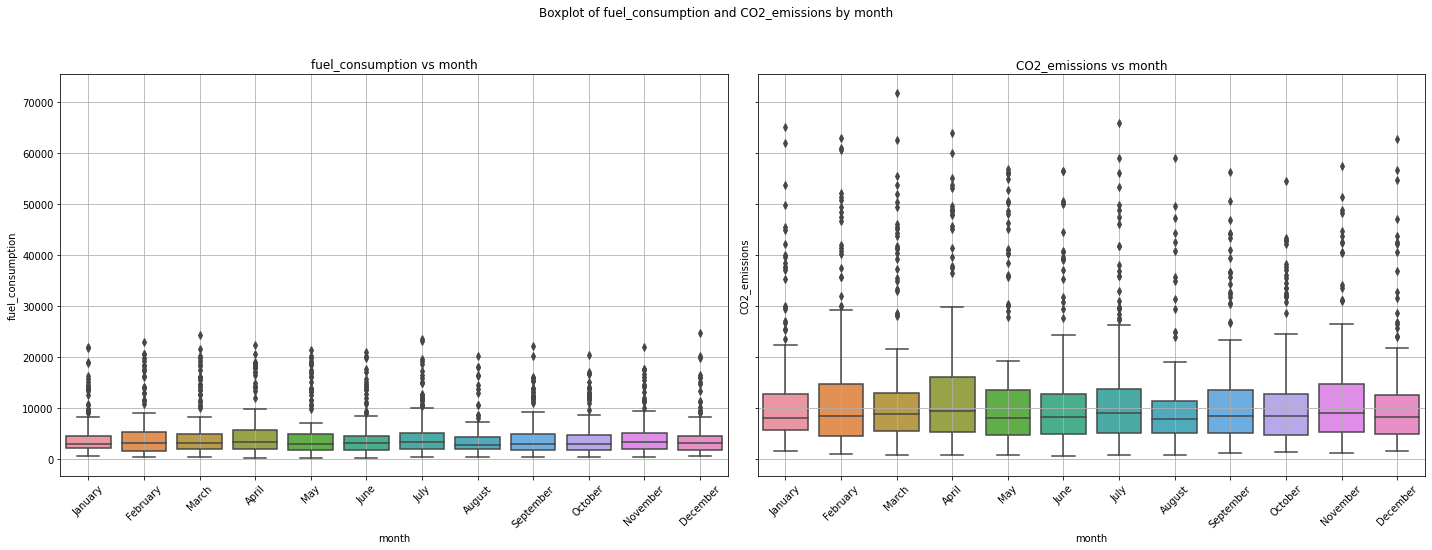

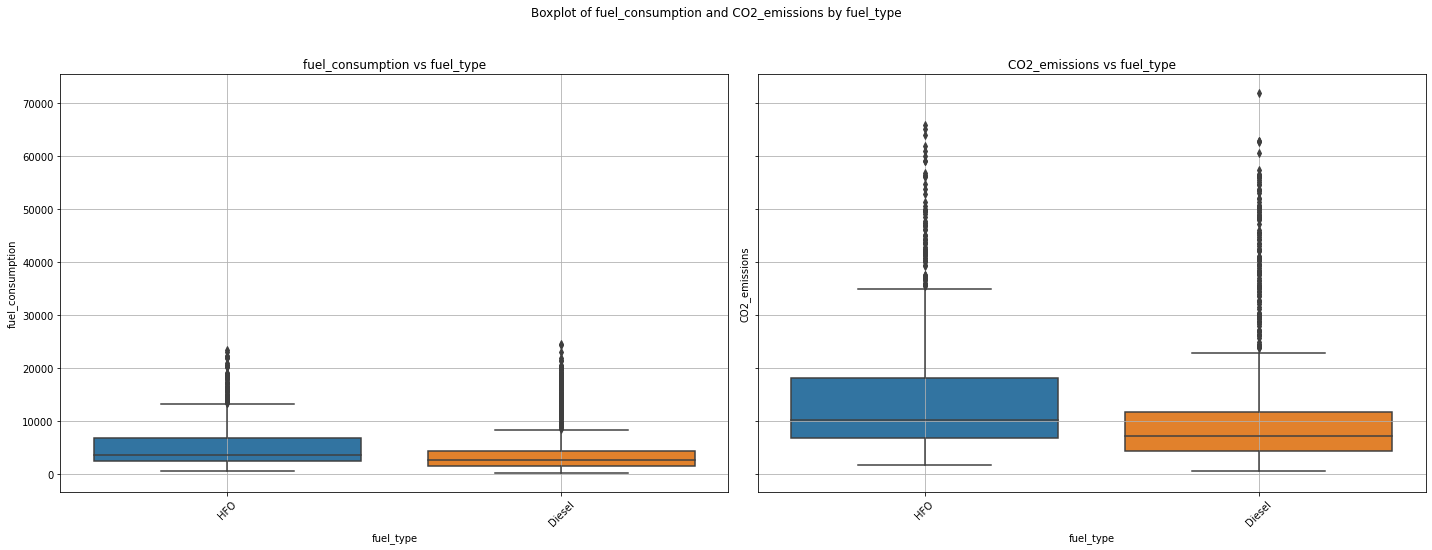

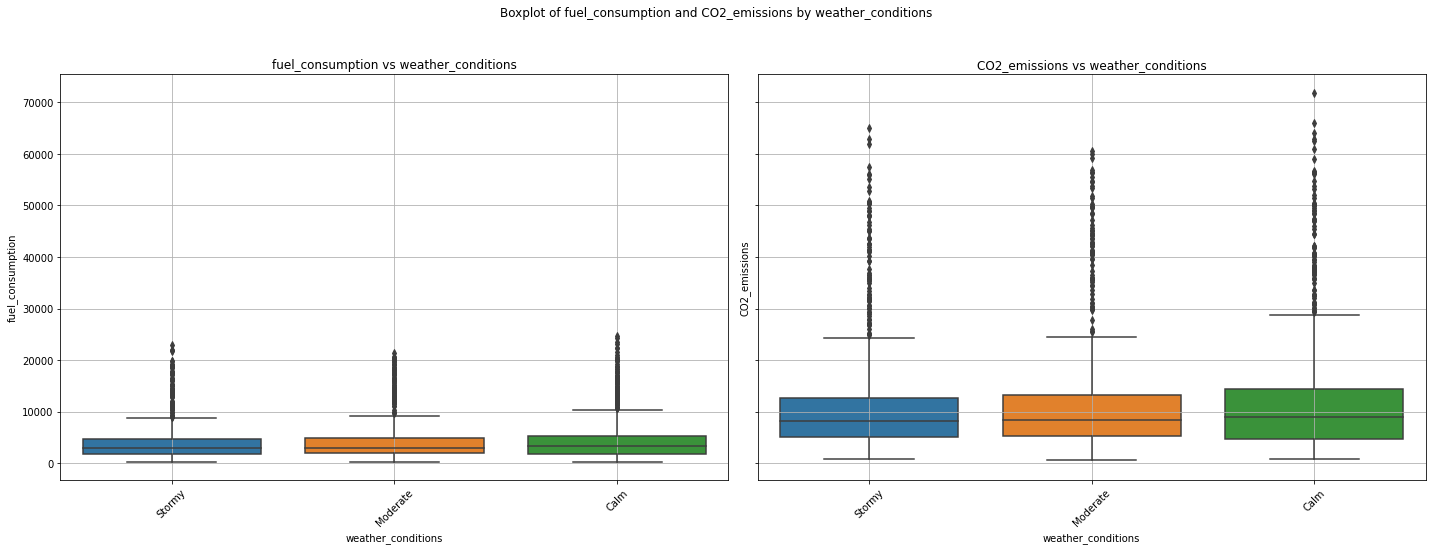

In [19]:
def plot_boxplots(df: pd.DataFrame) -> None:
    """
    Plot side-by-side boxplots for categrical columns against fuel_consumption and CO2_emission
    """

    cat_columns = df.select_dtypes(include=['object']).columns.drop('ship_id')
    target_columns = ['fuel_consumption', 'CO2_emissions']
    for cat_col in cat_columns:
        fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
        fig.suptitle(f'Boxplot of {target_columns[0]} and {target_columns[1]} by {cat_col}')

        for i, target_col in enumerate(target_columns):
            sns.boxplot(x=cat_col, y=target_col, data=df, ax=axes[i])
            axes[i].set_title(f'{target_col} vs {cat_col}')
            axes[i].set_xlabel(cat_col)
            axes[i].set_ylabel(target_col)
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].grid(True)
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

plot_boxplots(df)

there's a lot of outliers actually but at the same time i want to let them be. 

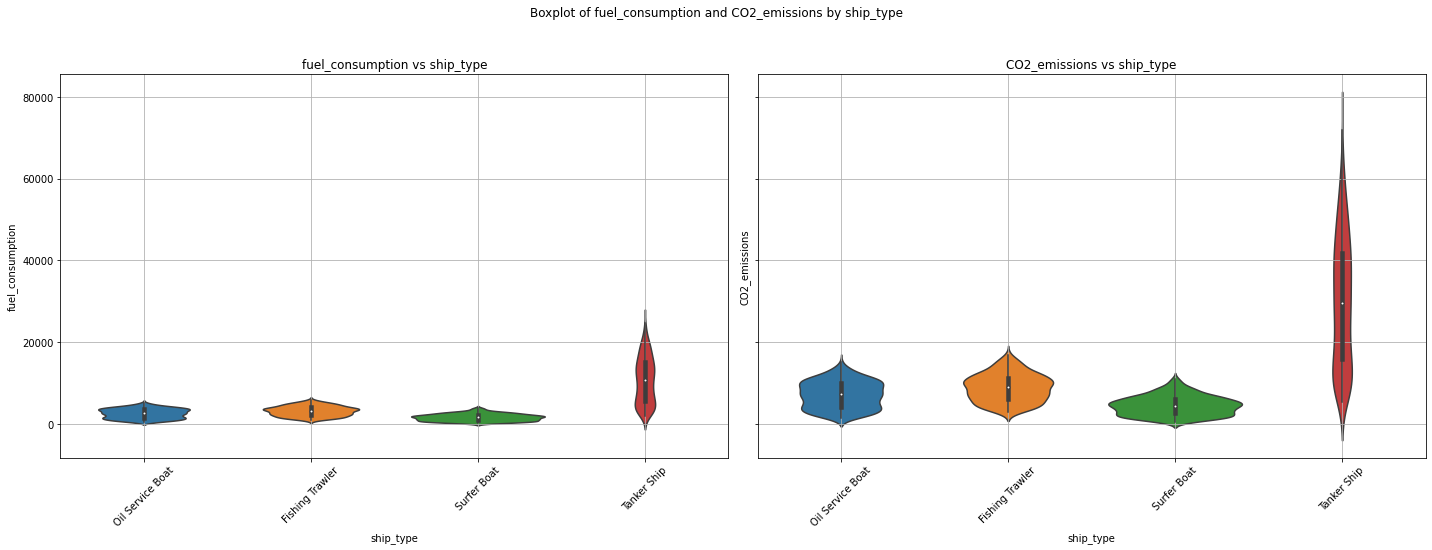

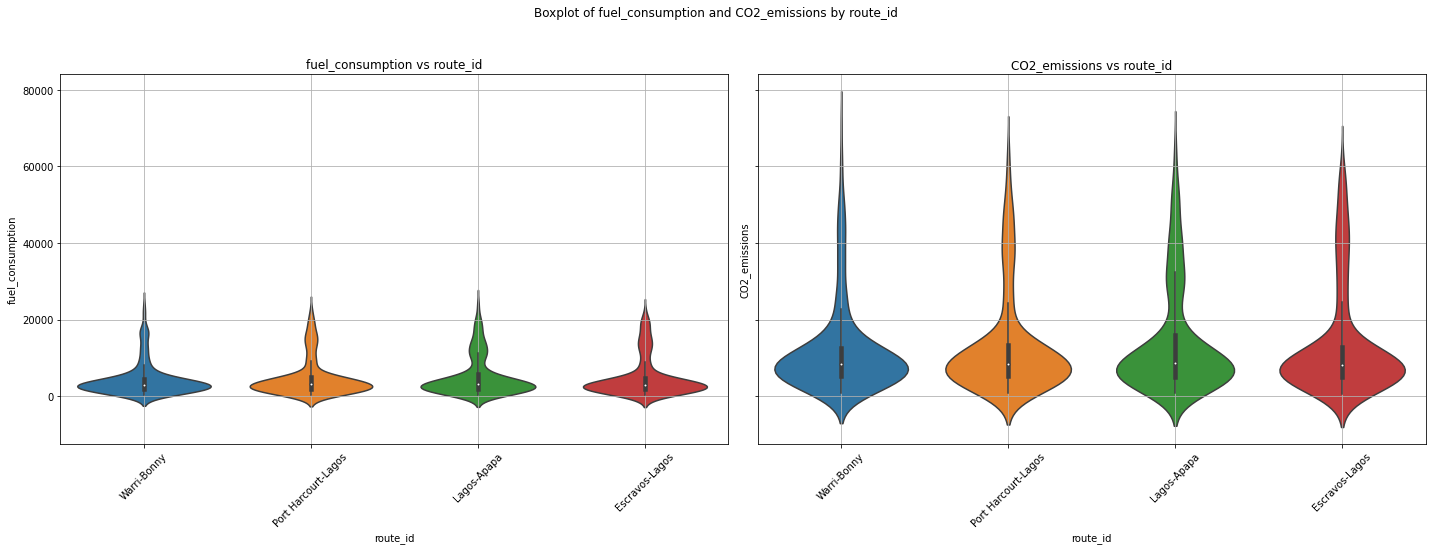

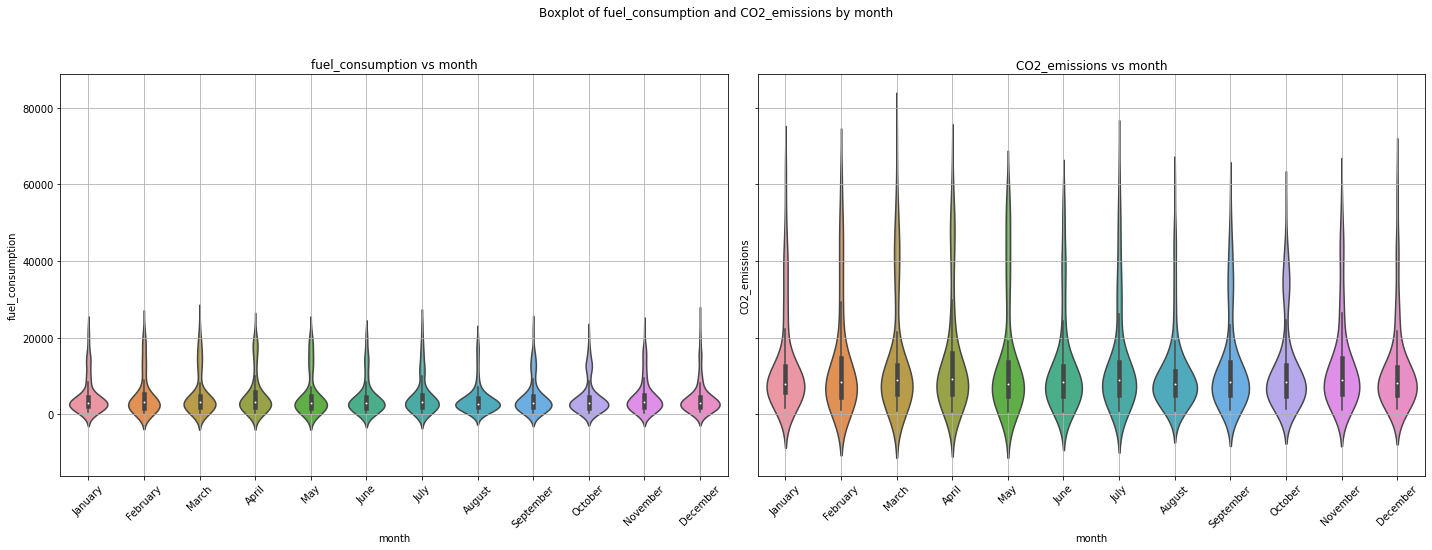

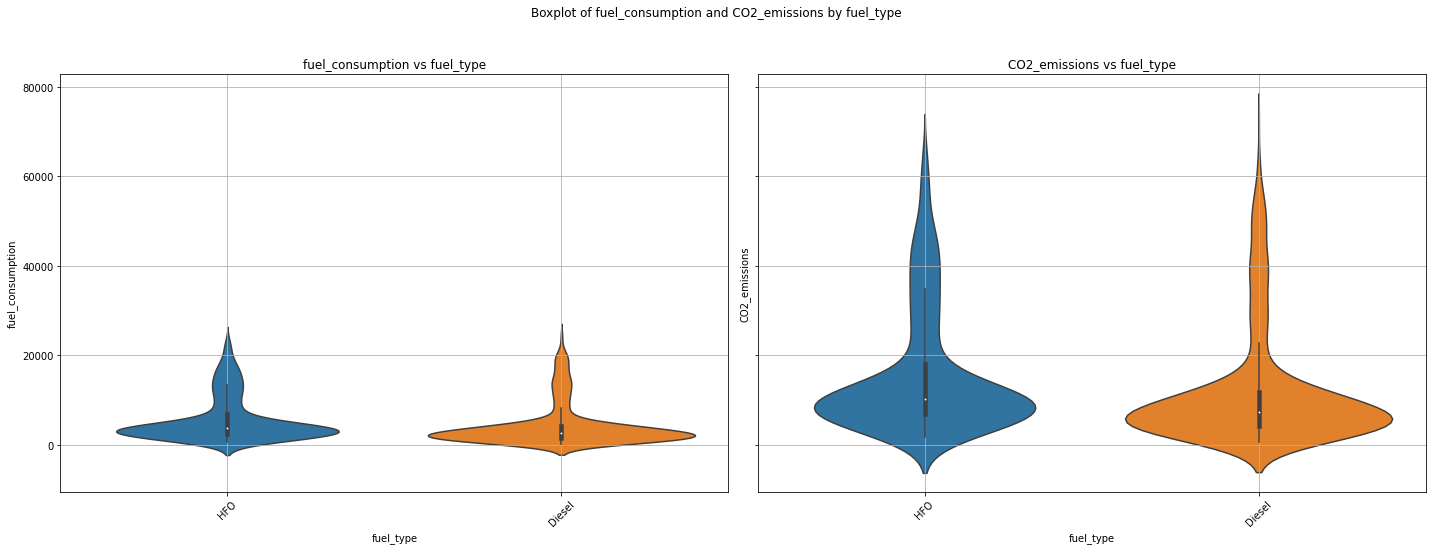

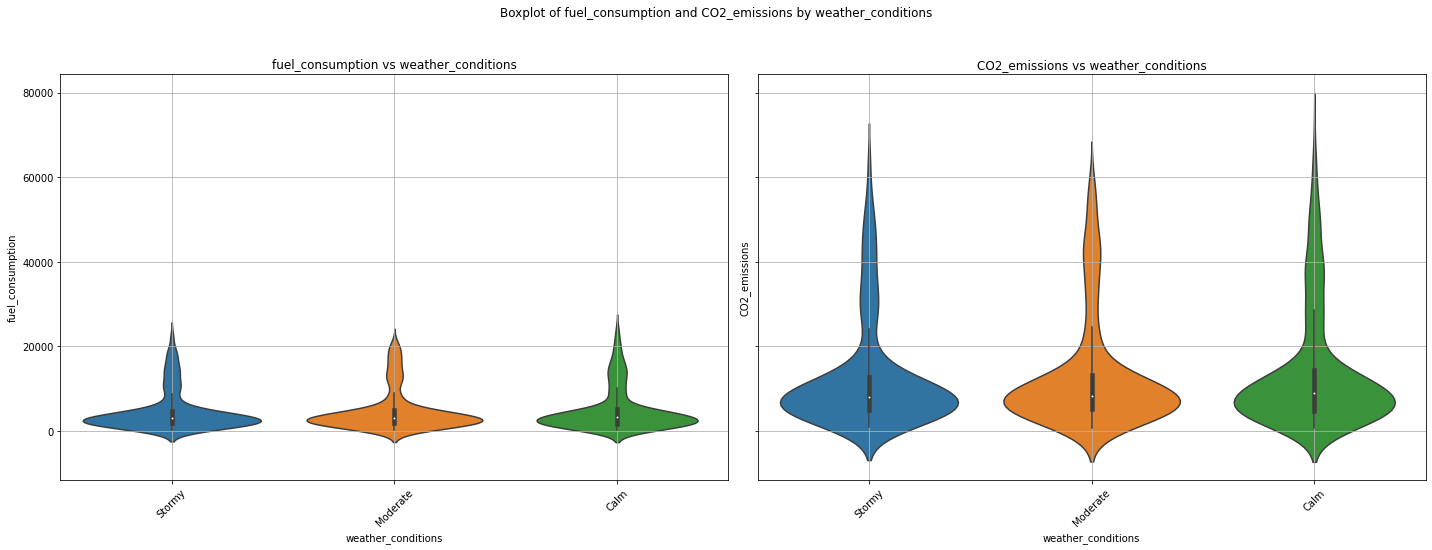

In [20]:
def plot_violinplot(df: pd.DataFrame) -> None:
    """
    Plot side-by-side violinplot for categrical columns against fuel_consumption and CO2_emission
    """

    cat_columns = df.select_dtypes(include=['object']).columns.drop('ship_id')
    target_columns = ['fuel_consumption', 'CO2_emissions']
    for cat_col in cat_columns:
        fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
        fig.suptitle(f'Boxplot of {target_columns[0]} and {target_columns[1]} by {cat_col}')

        for i, target_col in enumerate(target_columns):
            sns.violinplot(x=cat_col, y=target_col, data=df, ax=axes[i])
            axes[i].set_title(f'{target_col} vs {cat_col}')
            axes[i].set_xlabel(cat_col)
            axes[i].set_ylabel(target_col)
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].grid(True)
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

plot_violinplot(df)

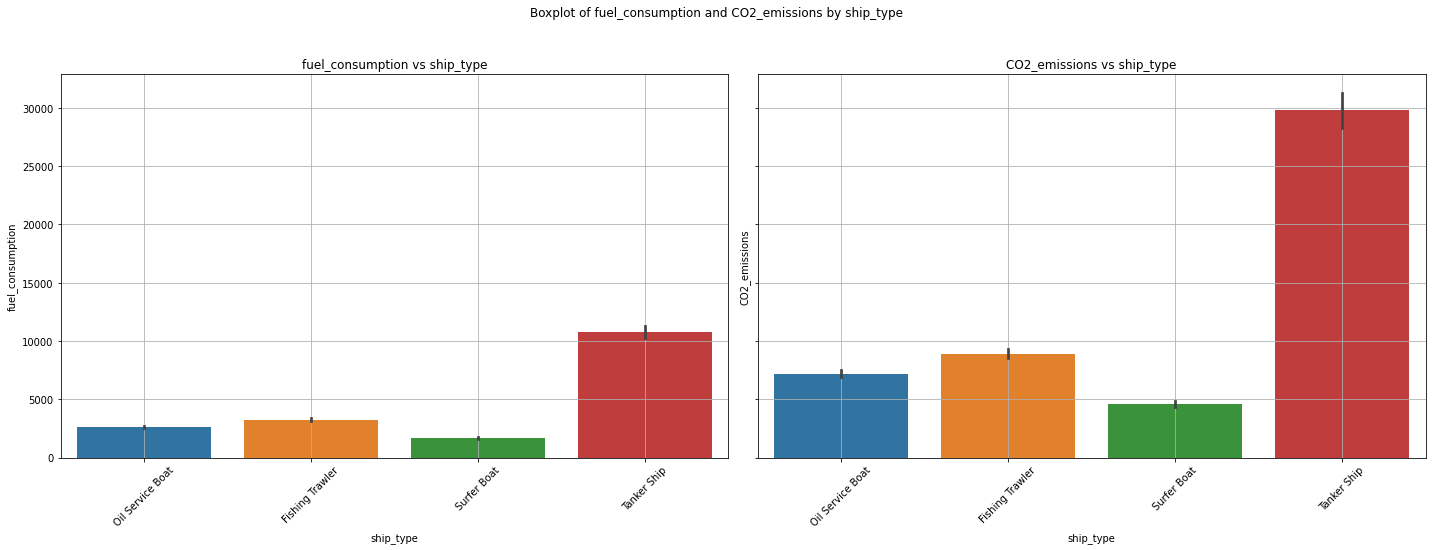

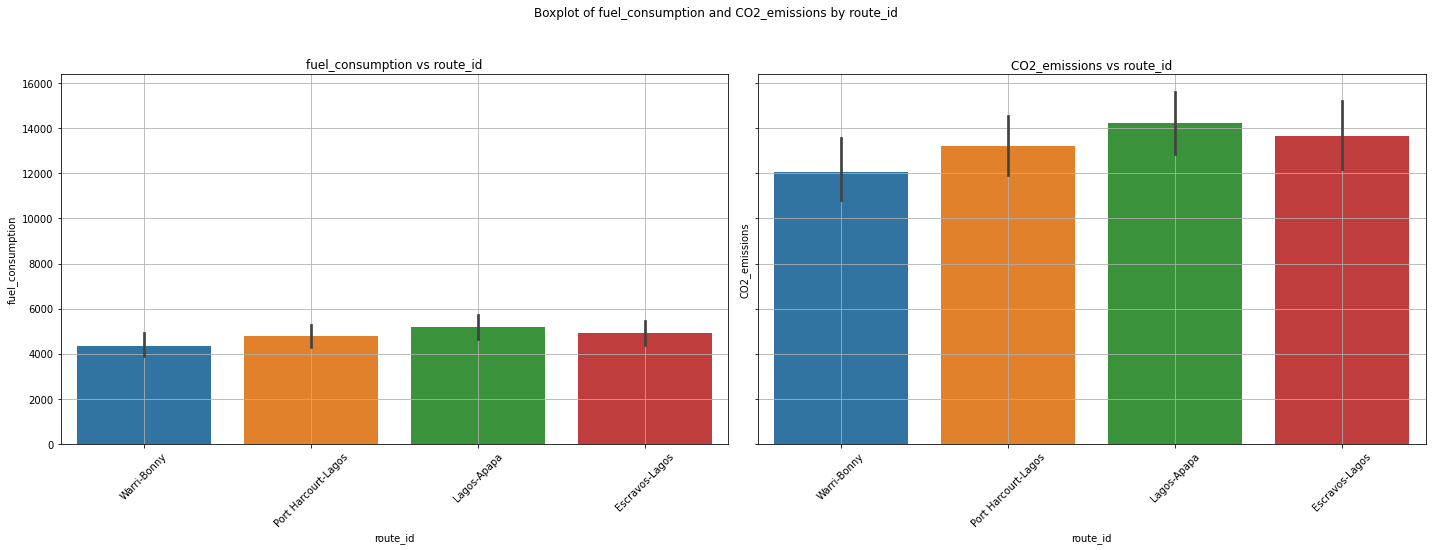

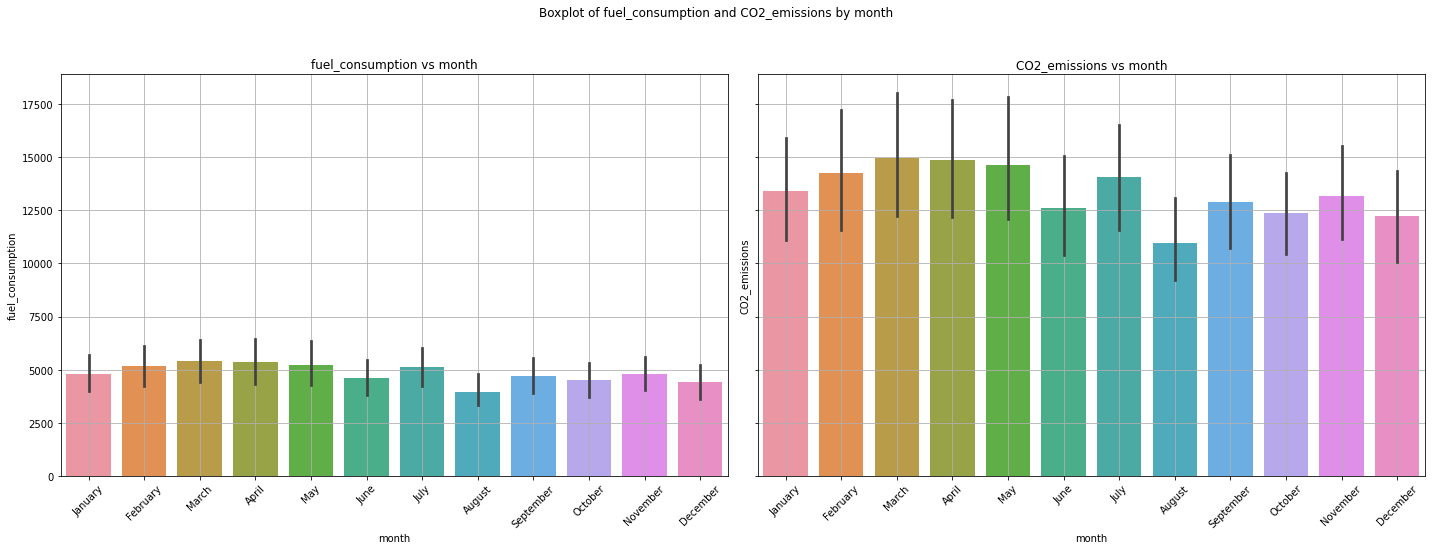

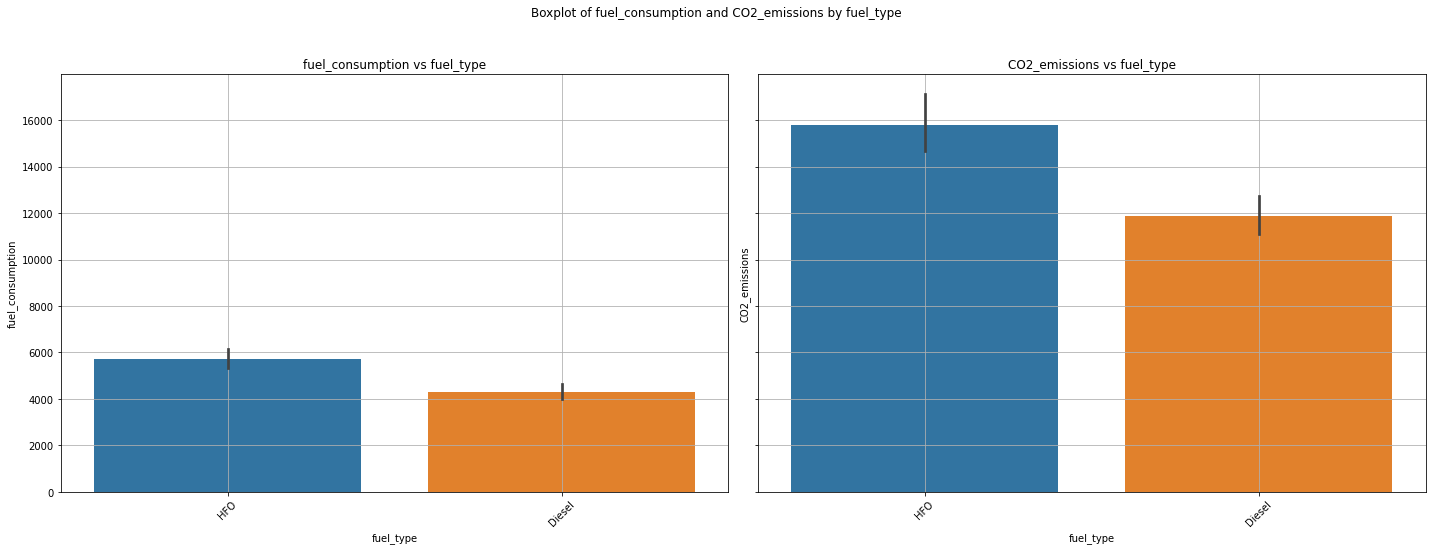

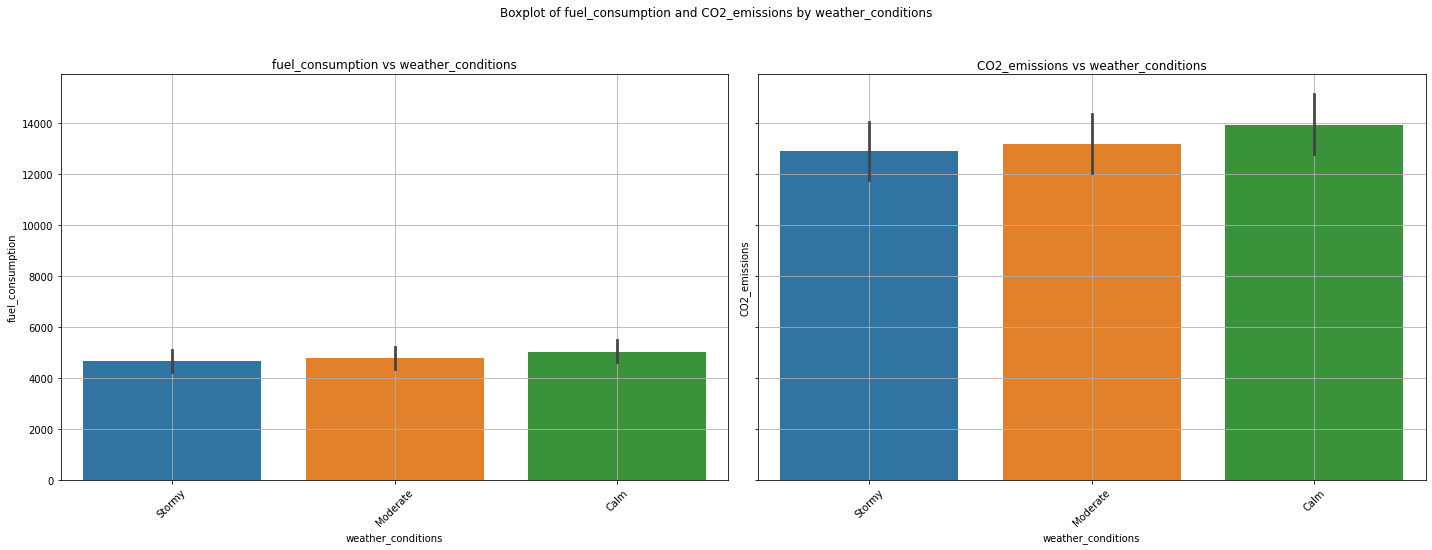

In [21]:
def plot_barplot(df: pd.DataFrame) -> None:
    """
    Plot side-by-side barplot for categrical columns against fuel_consumption and CO2_emission
    """

    cat_columns = df.select_dtypes(include=['object']).columns.drop('ship_id')
    target_columns = ['fuel_consumption', 'CO2_emissions']
    for cat_col in cat_columns:
        fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
        fig.suptitle(f'Boxplot of {target_columns[0]} and {target_columns[1]} by {cat_col}')

        for i, target_col in enumerate(target_columns):
            sns.barplot(x=cat_col, y=target_col, data=df, ax=axes[i])
            axes[i].set_title(f'{target_col} vs {cat_col}')
            axes[i].set_xlabel(cat_col)
            axes[i].set_ylabel(target_col)
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].grid(True)
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

plot_barplot(df)

bonus categorical vs numerical

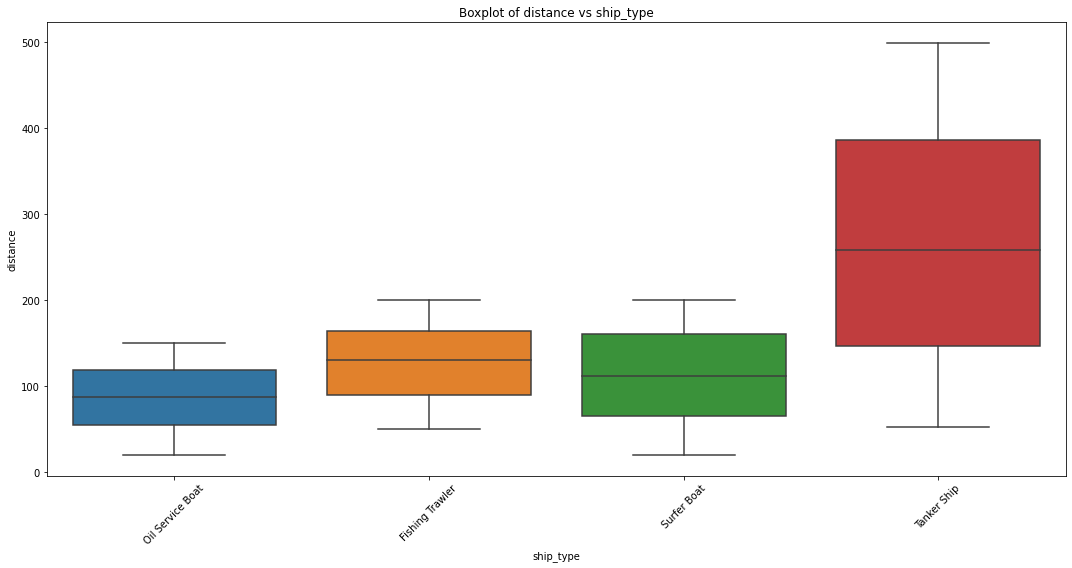

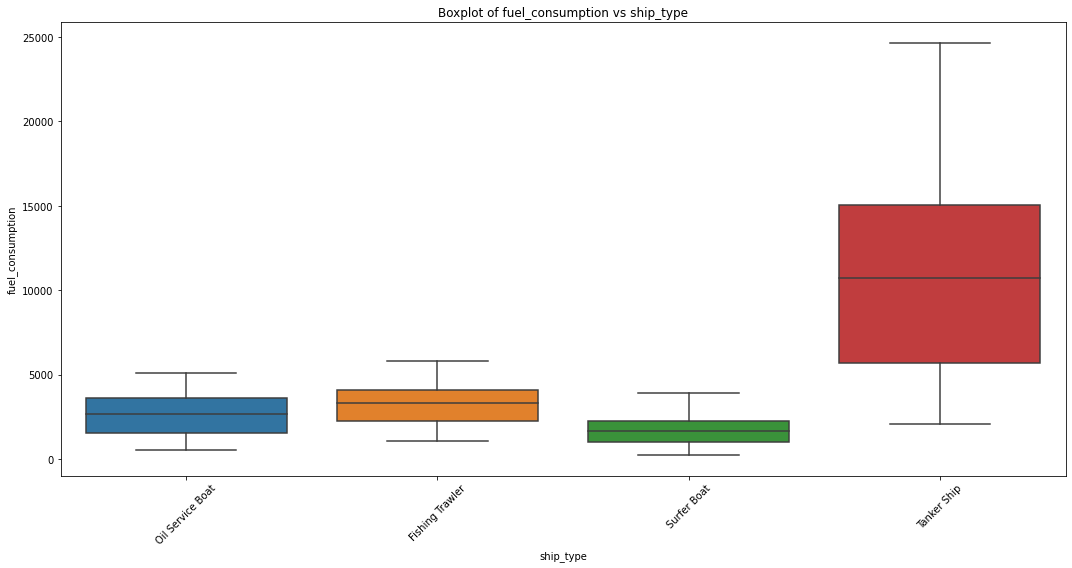

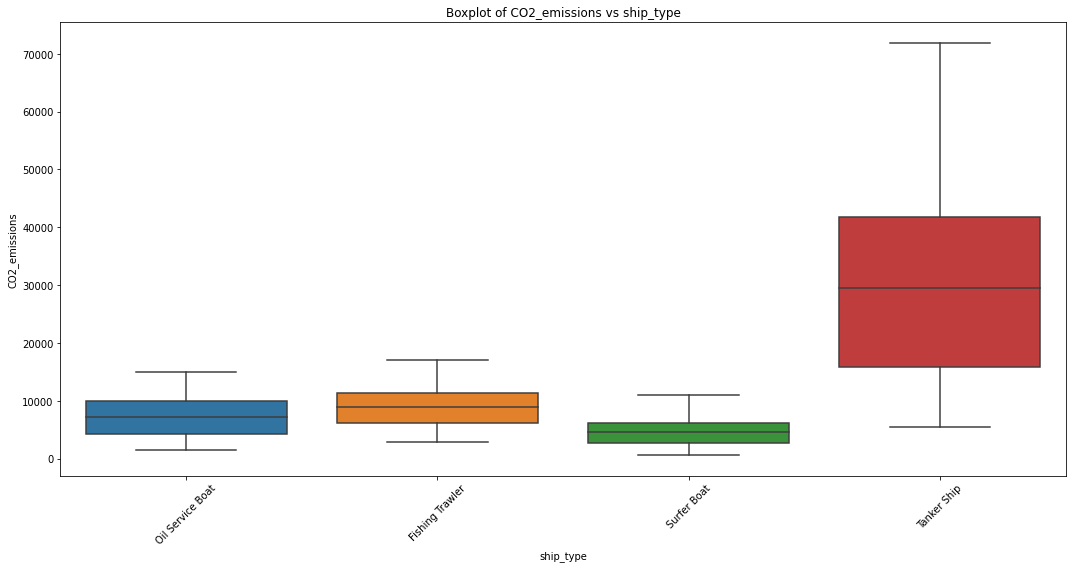

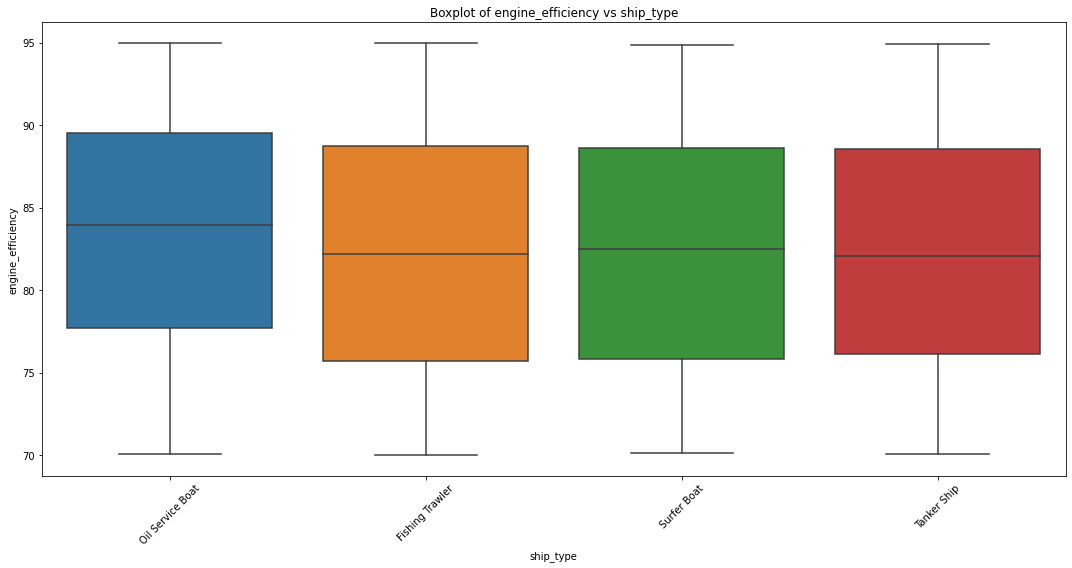

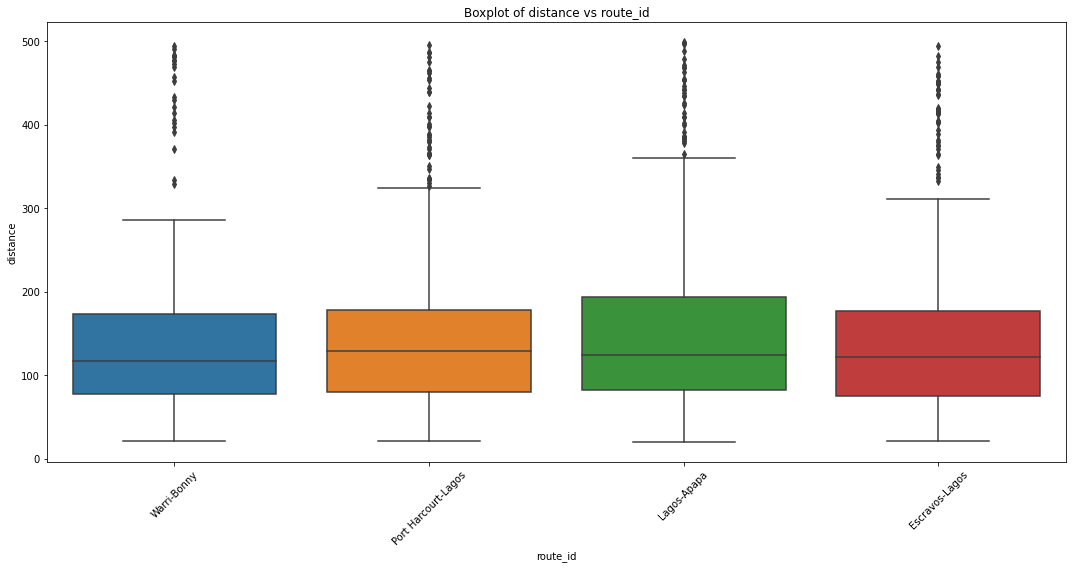

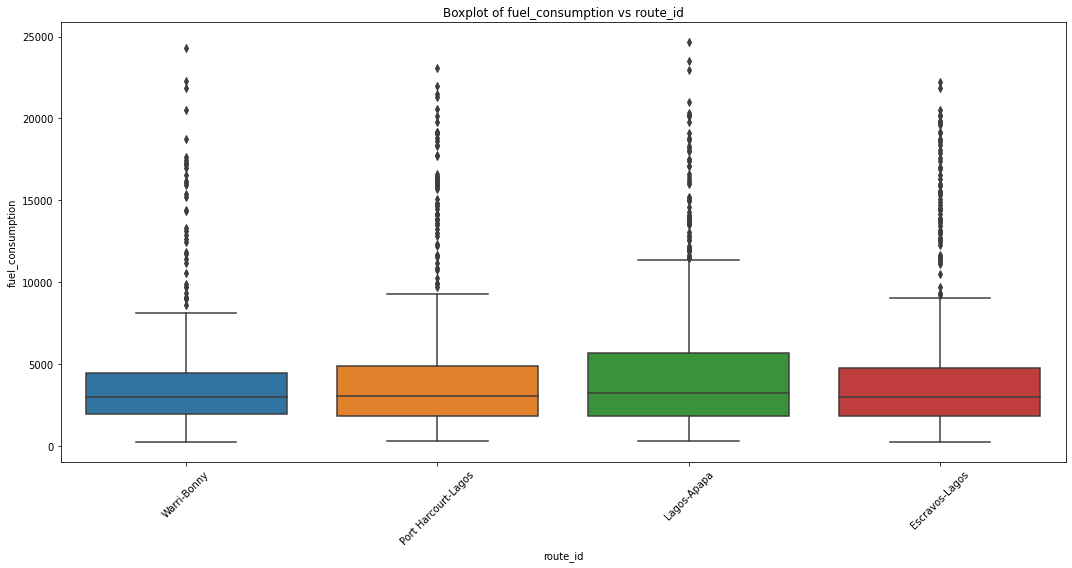

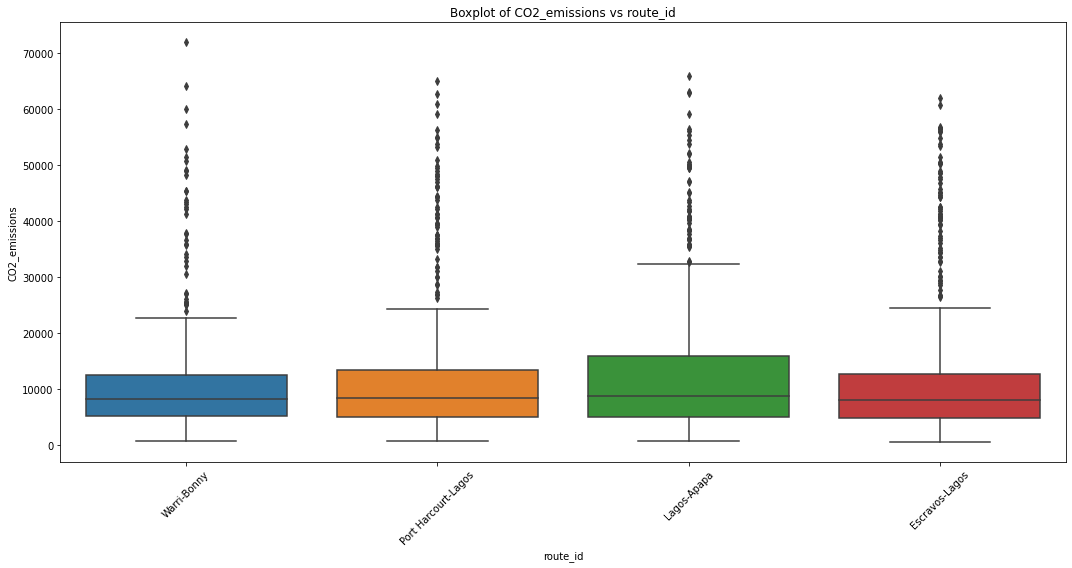

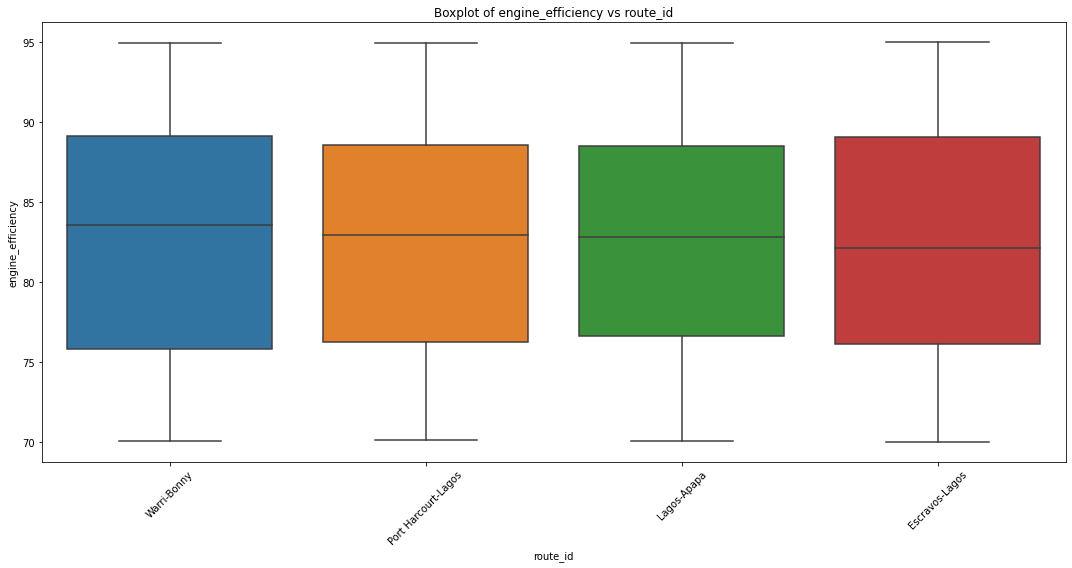

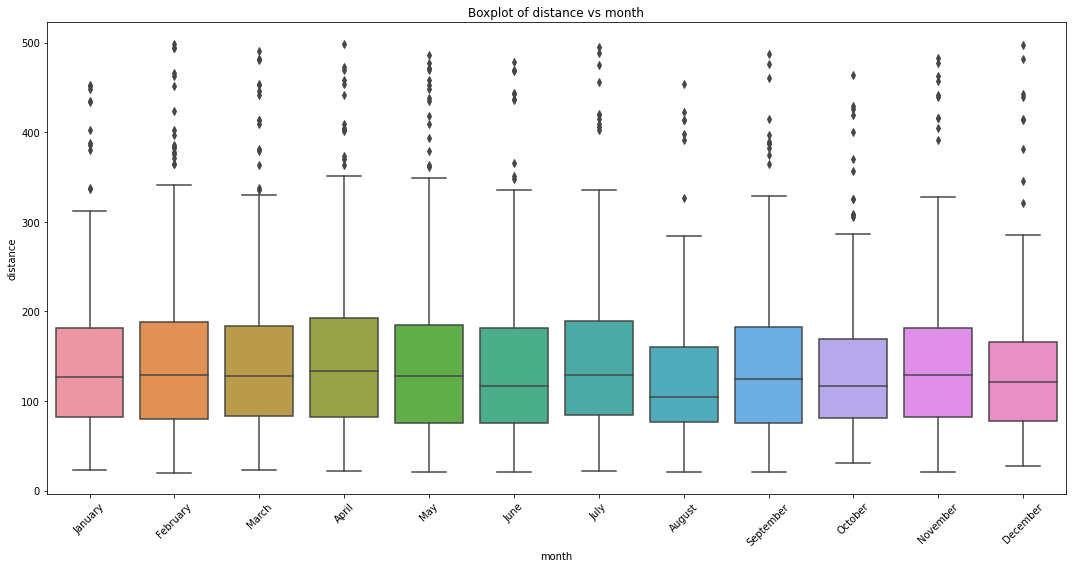

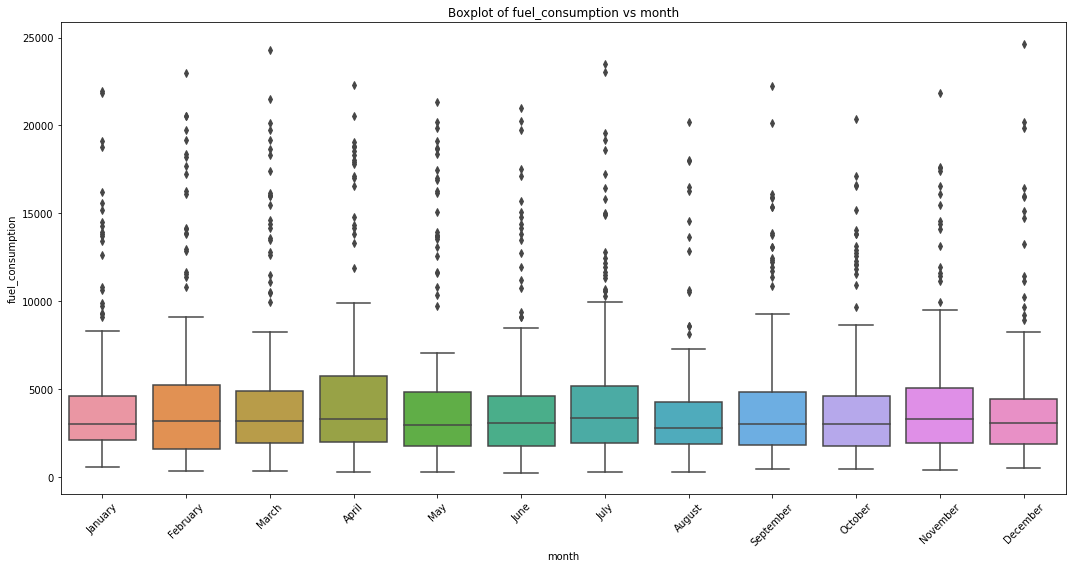

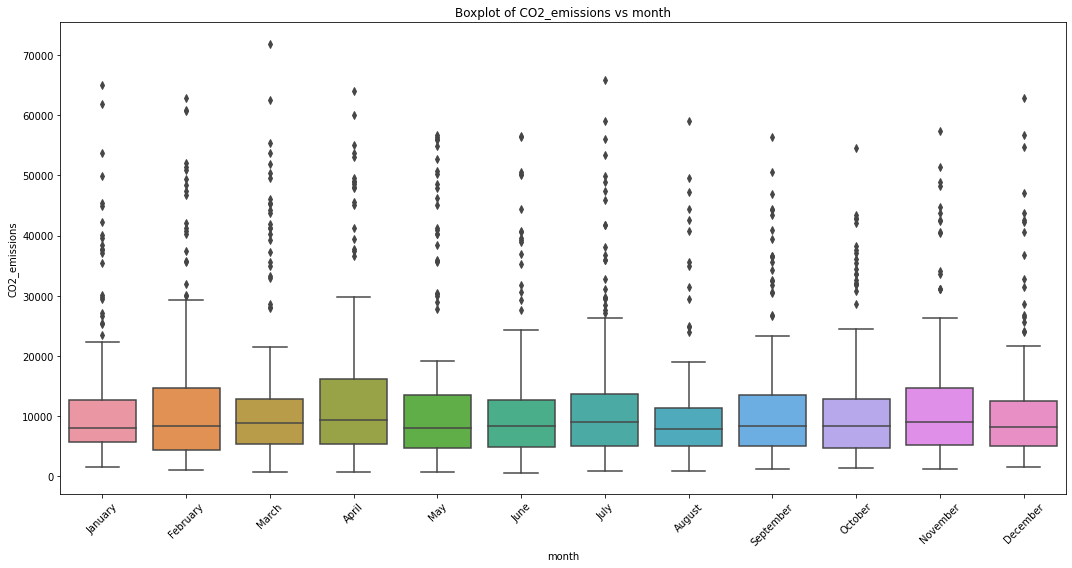

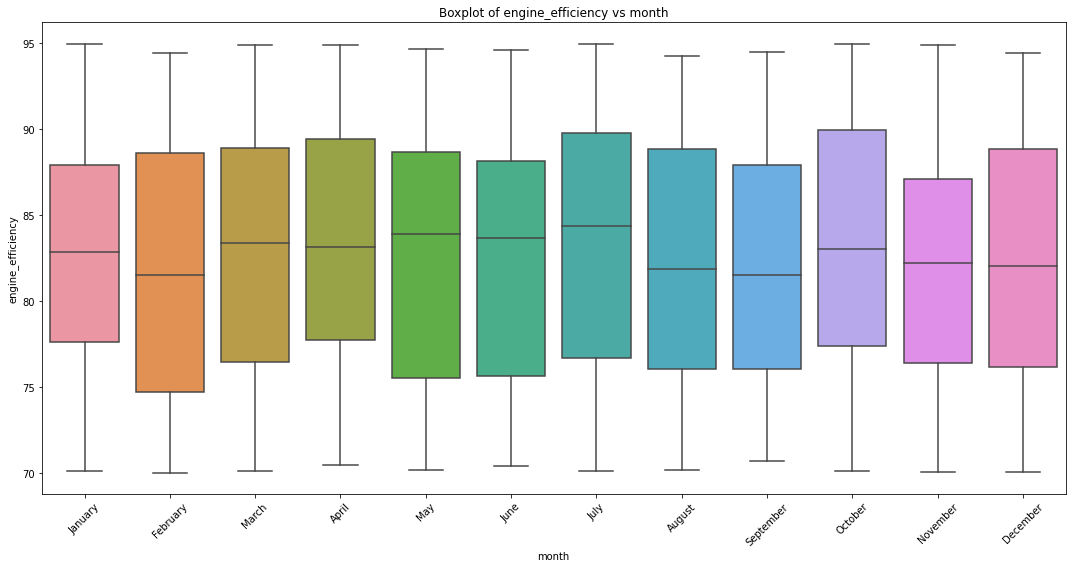

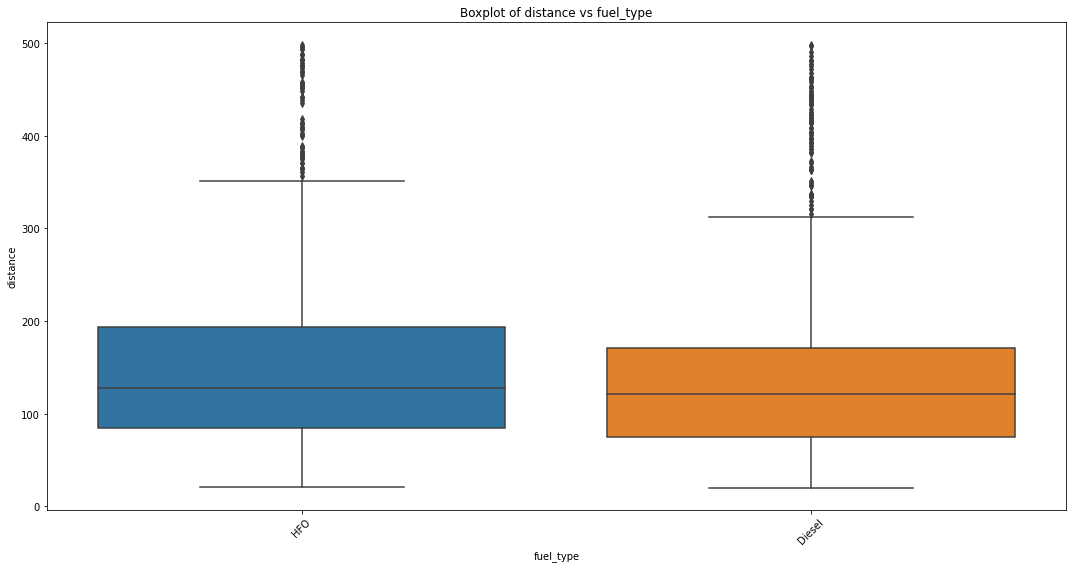

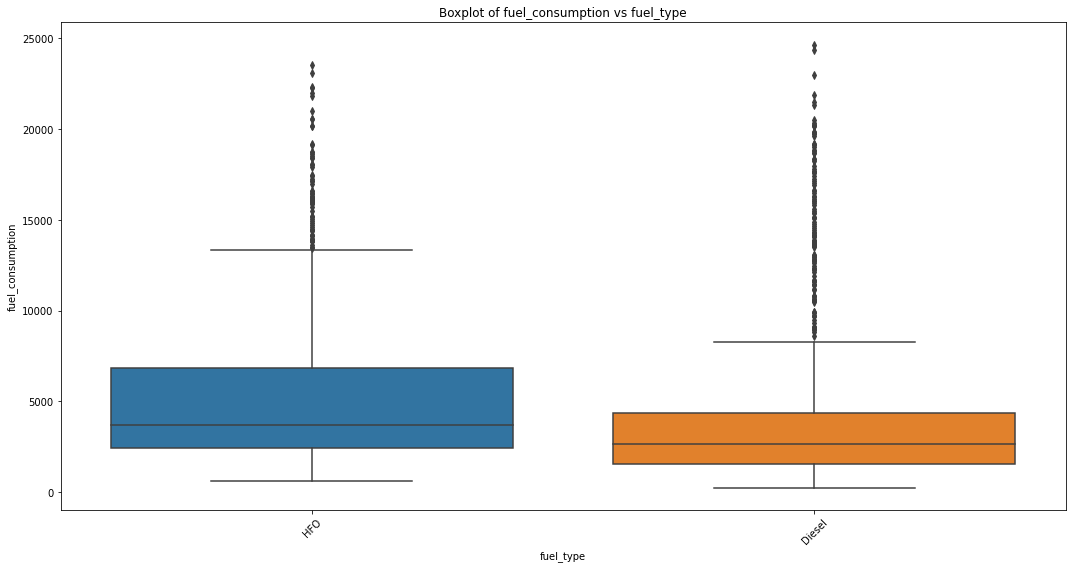

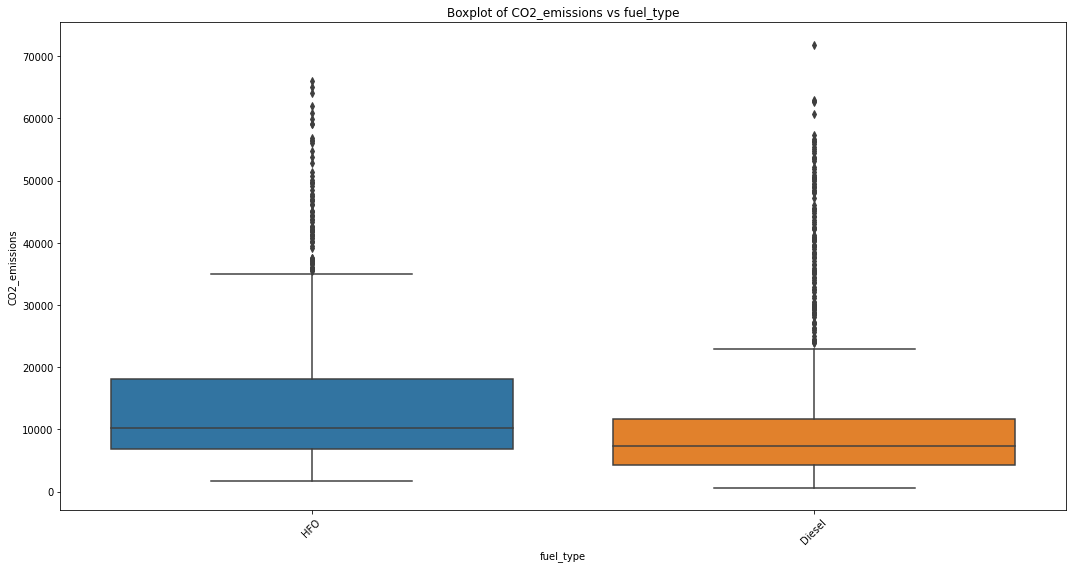

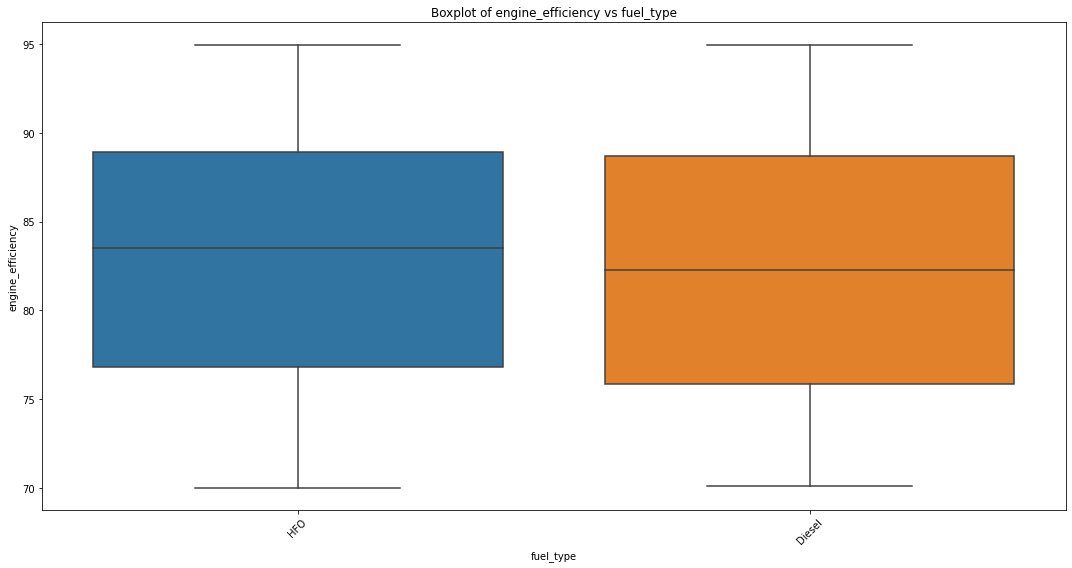

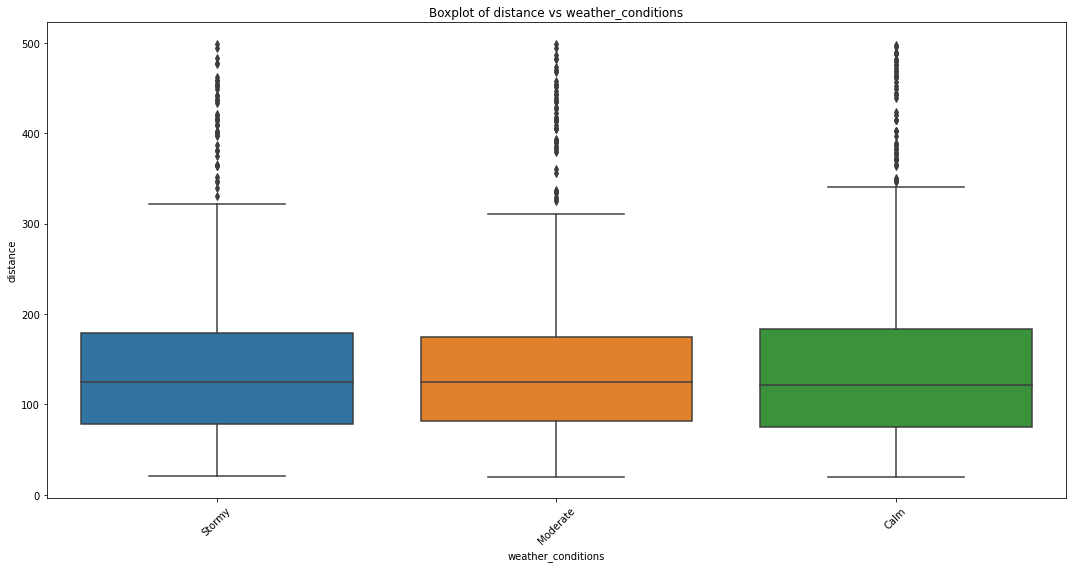

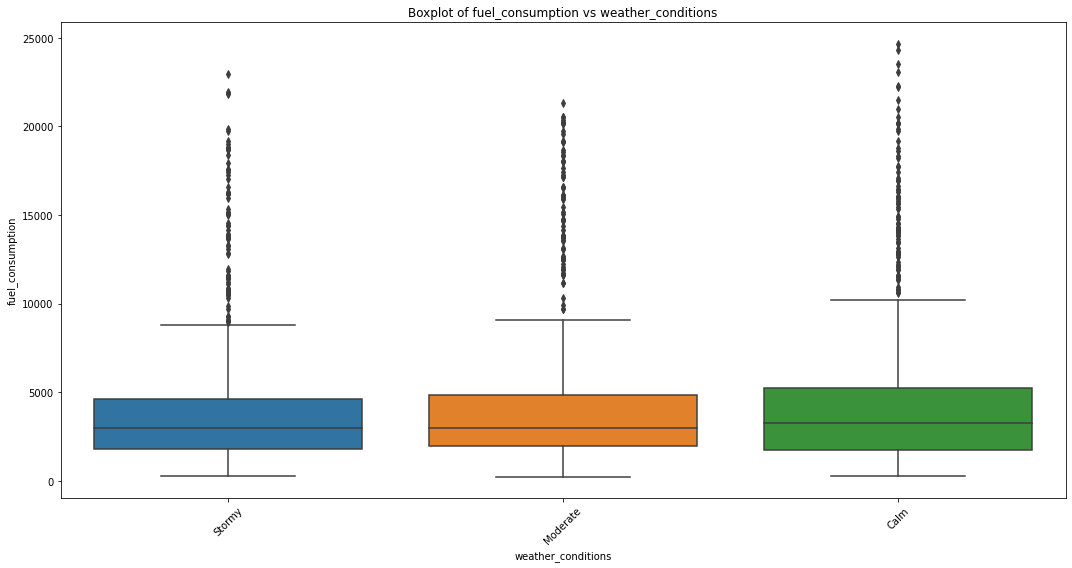

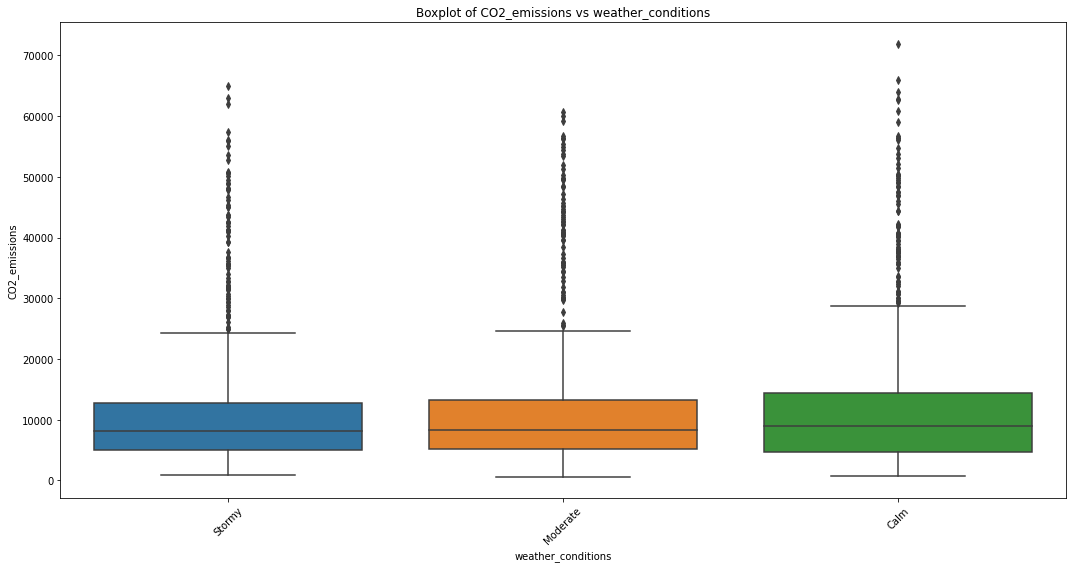

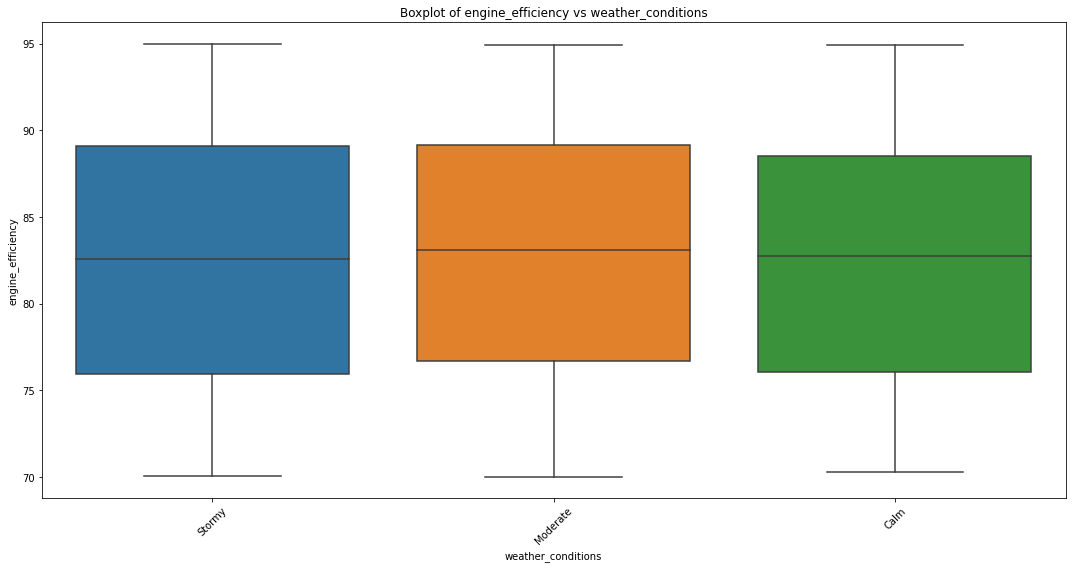

In [22]:
def plot_cat_vs_num(df: pd.DataFrame) -> None:
    """Plot categorical vs numerical columns"""
    cat_columns = df.select_dtypes(include=['object']).columns.drop('ship_id')
    num_columns = df.select_dtypes(include=['float64']).columns
    for cat in cat_columns:
        for num in num_columns:
            plt.figure(figsize=(15, 8))
            sns.boxplot(x=cat, y=num, data=df)
            plt.title(f'Boxplot of {num} vs {cat}')
            plt.xlabel(cat)
            plt.ylabel(num)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

plot_cat_vs_num(df)    

### EDA - Two Targets

In [23]:
target_columns = ['fuel_consumption', 'CO2_emissions']

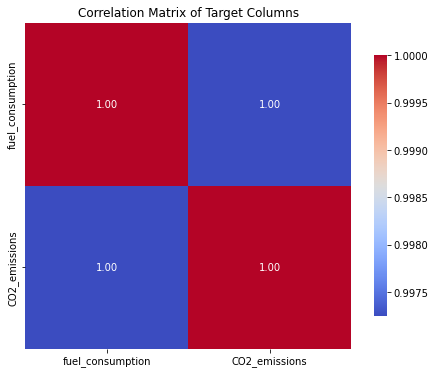

In [24]:
target_corr = df[target_columns].corr()

def plot_target_correlation(corr: pd.DataFrame) -> None:
    """Plot corelation matrix of target columns"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
    plt.title('Correlation Matrix of Target Columns')
    plt.show()

plot_target_correlation(target_corr)

they have a strong positive correlation, which mean that as fuel_consumption increases, CO2_emissions also increase.

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


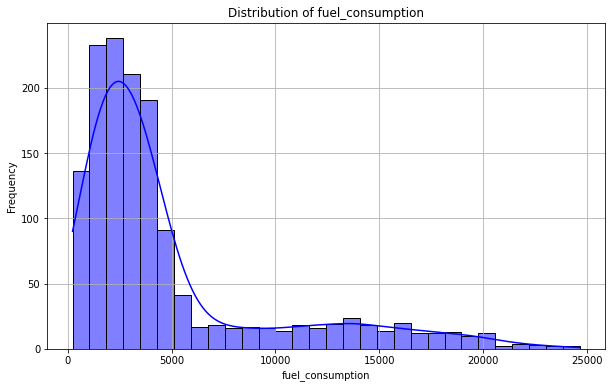

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


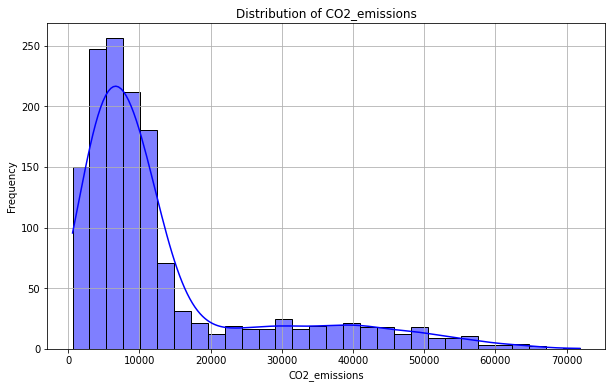

In [25]:
def plot_target_distribution(df: pd.DataFrame) -> None:
    """
    Plot distribution of target coloumns
    """

    for target_col in target_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[target_col], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {target_col}')
        plt.xlabel(target_col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    
plot_target_distribution(df)
    

it has long tail distribution, so will apply log transformation

#### Feature Engineering - Log Transformation

In [26]:
def apply_log_transform(df: pd.DataFrame) -> pd.DataFrame:
    """Apply log transformation to target columns"""

    for target in target_columns:
        df[target] = np.log1p(df[target])

    return df

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


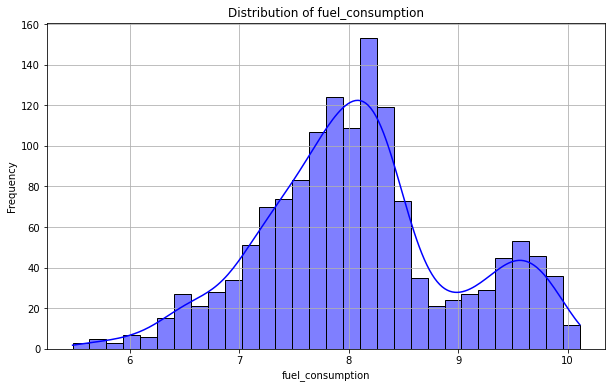

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


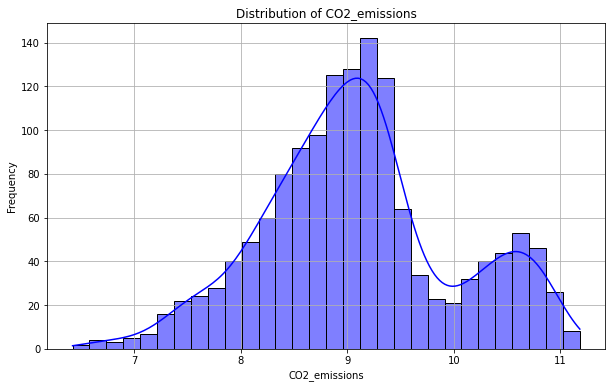

In [27]:
# see if log transform is applied
df = apply_log_transform(df)
plot_target_distribution(df)

## Modelling - Experiment Tracking

will going to do experiment tracking using mlflow

In [30]:
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [38]:
# Set the tracking URI 
mlflow.set_tracking_uri("sqlite:///mlflow.db")

# Set experiment name 
mlflow.set_experiment("ship_fuel_co2_mlops")

2025/07/07 09:48:38 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/07/07 09:48:38 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

<Experiment: artifact_location='file:///d:/github/ship_fuel_co2/notebooks/mlruns/1', creation_time=1751856519547, experiment_id='1', last_update_time=1751856519547, lifecycle_stage='active', name='ship_fuel_co2_mlops', tags={}>

In [31]:
def split_data(df: pd.DataFrame) -> tuple:
    """Split data into train and test sets """

    X = df.drop(columns=['ship_id', 'fuel_consumption', 'CO2_emissions'])
    y = df[['fuel_consumption', 'CO2_emissions']]

    df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return df_train, df_test, y_train, y_test

df_train, df_test, y_train, y_test = split_data(df)

In [32]:
len(df_train), len(df_test), len(y_train), len(y_test)

(1152, 288, 1152, 288)

So we have 1152 data for training and 288 for testing

In [33]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.multioutput import MultiOutputRegressor


In [34]:
def preprocess_data(df_train: pd.DataFrame, df_test: pd.DataFrame) -> tuple:
    """Convert training and test DataFrames into vectorized arrays using DictVectorizer."""

    dv = DictVectorizer(sparse=False)
    train_dict = df_train.to_dict(orient='records')
    test_dict = df_test.to_dict(orient='records')

    # fit and transform
    X_train = dv.fit_transform(train_dict)
    X_test = dv.transform(test_dict)

    return X_train, X_test, dv

X_train, X_test, dv = preprocess_data(df_train, df_test)

In [35]:
from dataclasses import dataclass
@dataclass
class Dataset:
    """Dataset class to hold training and test data."""
    X_train: np.ndarray
    X_test: np.ndarray
    y_train: np.ndarray
    y_test: np.ndarray


In [ ]:
def train_model(model_class, model_params: dict, dataset: Dataset) -> tuple:
    """ Train a model and log the experiment with mlflow"""

    with mlflow.start_run(run_name=f"{model_class.__name__}") as run:
        model = model_class(**model_params)
        mo_model = MultiOutputRegressor(model)
        mo_model.fit(dataset.X_train, dataset.y_train)

        y_pred = mo_model.predict(dataset.X_test)
        rmse = np.sqrt(np.mean((dataset.y_test - y_pred) ** 2))

        # log parameters and metrics
        mlflow.set_tag("model", model_class.__name__)
        mlflow.set_tag("model_params", str(model_params))
        mlflow.set_tag("type", "multioutput_regression")
        mlflow.log_params(model_params)
        mlflow.log_metric(f'{model_class.__name__}_rmse', rmse)
        mlflow.sklearn.log_model(mo_model, "model", registered_model_name=f'{model_class.__name__}_model')

        return mo_model, run.info.run_id, rmse


In [37]:
# Parameters for different models
param_grid = {
    LinearRegression: [{}],
    Ridge: [{'alpha': 0.1}, {'alpha': 1.0}, {'alpha': 10.0}],
    RandomForestRegressor: [
        {'n_estimators': 20, 'max_depth': 5},
        {'n_estimators': 50, 'max_depth': 5},
        {'n_estimators': 100, 'max_depth': 10}
    ],
    DecisionTreeRegressor:[
        {'max_depth': 5, 'min_samples_leaf': 10},
        {'max_depth': 10, 'min_samples_leaf': 20},
        {'max_depth': 15, 'min_samples_leaf': 30}
    ],
    XGBRegressor: [
        {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1},
        {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01},
        {'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.005}
    ],
    LGBMRegressor: [
        {'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.1},
        {'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.01},
        {'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.005}
    ]
}

In [39]:
import time

In [ ]:
def train_all_models(param_grid: dict, dataset: Dataset) -> pd.DataFrame:
    """Train all models in the param_grid and return a DataFrame with results"""

    results = []
    for model_class, param_list in param_grid.items():
        for params in param_list:
            start = time.time()
            model, run_id, rmse = train_model(model_class, params, dataset)
            duration = time.time() - start
            results.append({
                'model' : model_class.__name__,
                'params': params,
                'run_id': run_id,
                'rmse': rmse,
                'duration': duration
            })
            print((f'Training {model_class.__name__} with params: {params}'))
            print(f'Run ID: {run_id}, RMSE: {rmse:.4f}, Duration: {duration: .2f}')

    return pd.DataFrame(results)

dataset=Dataset(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
results_df = train_all_models(param_grid, dataset)
results_df.sort_values(by='rmse', ascending=True, inplace=True)
results_df.reset_index(drop=True, inplace=True)


# save to csv 
results_df.to_csv('../results/results_df.csv', index=False)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'LinearRegression_model'.
Created version '1' of model 'LinearRegression_model'.
2025/07/07 09:49:41 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training LinearRegression with params: {}
Run ID: f7b85850e8c041f092e6e1b4f752a0e8, RMSE: 0.3150, Duration:  19.08


Successfully registered model 'Ridge_model'.
Created version '1' of model 'Ridge_model'.
2025/07/07 09:49:45 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training Ridge with params: {'alpha': 0.1}
Run ID: a6c39bea301347b3adeeb156a2d8807e, RMSE: 0.3150, Duration:  4.04


Registered model 'Ridge_model' already exists. Creating a new version of this model...
Created version '2' of model 'Ridge_model'.
2025/07/07 09:49:49 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training Ridge with params: {'alpha': 1.0}
Run ID: 62b3f906240f465b93a9c31b609e8288, RMSE: 0.3150, Duration:  3.83


Registered model 'Ridge_model' already exists. Creating a new version of this model...
Created version '3' of model 'Ridge_model'.
2025/07/07 09:49:53 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training Ridge with params: {'alpha': 10.0}
Run ID: 6d8cbb4652634b4db15263d0acf807dd, RMSE: 0.3157, Duration:  3.75


Successfully registered model 'RandomForestRegressor_model'.
Created version '1' of model 'RandomForestRegressor_model'.
2025/07/07 09:49:57 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training RandomForestRegressor with params: {'n_estimators': 20, 'max_depth': 5}
Run ID: 0652ea67af7d44d19f779be35e70b9ab, RMSE: 0.1736, Duration:  4.17


Registered model 'RandomForestRegressor_model' already exists. Creating a new version of this model...
Created version '2' of model 'RandomForestRegressor_model'.
2025/07/07 09:50:02 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training RandomForestRegressor with params: {'n_estimators': 50, 'max_depth': 5}
Run ID: 38c1519bd6544a128641d4f8858d9f9f, RMSE: 0.1722, Duration:  4.49


Registered model 'RandomForestRegressor_model' already exists. Creating a new version of this model...
Created version '3' of model 'RandomForestRegressor_model'.
2025/07/07 09:50:07 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training RandomForestRegressor with params: {'n_estimators': 100, 'max_depth': 10}
Run ID: 1627f1bf2e13409aa7c20e067c788d66, RMSE: 0.1524, Duration:  5.08


Successfully registered model 'DecisionTreeRegressor_model'.
Created version '1' of model 'DecisionTreeRegressor_model'.
2025/07/07 09:50:10 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training DecisionTreeRegressor with params: {'max_depth': 5, 'min_samples_leaf': 10}
Run ID: cdfbe0b312164d31ac24dd67cfebaec1, RMSE: 0.1966, Duration:  3.80


Registered model 'DecisionTreeRegressor_model' already exists. Creating a new version of this model...
Created version '2' of model 'DecisionTreeRegressor_model'.
2025/07/07 09:50:15 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training DecisionTreeRegressor with params: {'max_depth': 10, 'min_samples_leaf': 20}
Run ID: 8dc09957b151445593c2d269ce975269, RMSE: 0.1747, Duration:  4.05


Registered model 'DecisionTreeRegressor_model' already exists. Creating a new version of this model...
Created version '3' of model 'DecisionTreeRegressor_model'.
2025/07/07 09:50:19 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training DecisionTreeRegressor with params: {'max_depth': 15, 'min_samples_leaf': 30}
Run ID: c457e0ab6c6147e6a434466a7f7c9b50, RMSE: 0.1906, Duration:  4.14


Successfully registered model 'XGBRegressor_model'.
Created version '1' of model 'XGBRegressor_model'.
2025/07/07 09:50:24 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training XGBRegressor with params: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}
Run ID: c9efcbcda3cb40d1a1b7cd3fff6df4df, RMSE: 0.1498, Duration:  5.69


Registered model 'XGBRegressor_model' already exists. Creating a new version of this model...
Created version '2' of model 'XGBRegressor_model'.
2025/07/07 09:50:30 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training XGBRegressor with params: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01}
Run ID: 91a39b33cc704c7ba5dbb4cdb95a8e69, RMSE: 0.3880, Duration:  5.76


Registered model 'XGBRegressor_model' already exists. Creating a new version of this model...
Created version '3' of model 'XGBRegressor_model'.
2025/07/07 09:50:37 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training XGBRegressor with params: {'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.005}
Run ID: cbce6fc793d34898a9b0673b02467edc, RMSE: 0.4789, Duration:  7.06
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 1152, number of used features: 27
[LightGBM] [Info] Start training from score 8.078596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

Successfully registered model 'LGBMRegressor_model'.
Created version '1' of model 'LGBMRegressor_model'.
2025/07/07 09:50:42 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training LGBMRegressor with params: {'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.1}
Run ID: 5bd96b4e494145d29530015d5aabcb18, RMSE: 0.3667, Duration:  4.71
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 1152, number of used features: 27
[LightGBM] [Info] Start training from score 8.078596
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 1152, number of used features: 27
[LightGBM] [Info] Start training from score 9.089146


Registered model 'LGBMRegressor_model' already exists. Creating a new version of this model...
Created version '2' of model 'LGBMRegressor_model'.
2025/07/07 09:50:46 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training LGBMRegressor with params: {'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.01}
Run ID: 0ae65b7e52d7419cb34dd4d274b67b73, RMSE: 0.5879, Duration:  4.21
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 1152, number of used features: 27
[LightGBM] [Info] Start training from score 8.078596
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 1152, number of used features: 27
[LightGBM] [Info] Start training from score 9.089146


Registered model 'LGBMRegressor_model' already exists. Creating a new version of this model...
Created version '3' of model 'LGBMRegressor_model'.
2025/07/07 09:50:50 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Training LGBMRegressor with params: {'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.005}
Run ID: 51595e91053241e0ad84e3d515691ed0, RMSE: 0.5886, Duration:  4.30


Actually we can accsess the results in mlflow ui too but i feel i just want to do extra, so that's why i made that results_df.

In [41]:
# see the results
results_df

,model,params,run_id,rmse,duration
0,XGBRegressor,"{'n_estimators': 50, 'max_depth': 5, 'learning...",c9efcbcda3cb40d1a1b7cd3fff6df4df,0.149752,5.686445
1,RandomForestRegressor,"{'n_estimators': 100, 'max_depth': 10}",1627f1bf2e13409aa7c20e067c788d66,0.152415,5.080007
2,RandomForestRegressor,"{'n_estimators': 50, 'max_depth': 5}",38c1519bd6544a128641d4f8858d9f9f,0.172232,4.490141
3,RandomForestRegressor,"{'n_estimators': 20, 'max_depth': 5}",0652ea67af7d44d19f779be35e70b9ab,0.173555,4.168105
4,DecisionTreeRegressor,"{'max_depth': 10, 'min_samples_leaf': 20}",8dc09957b151445593c2d269ce975269,0.174722,4.045306
5,DecisionTreeRegressor,"{'max_depth': 15, 'min_samples_leaf': 30}",c457e0ab6c6147e6a434466a7f7c9b50,0.190577,4.143900
6,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_leaf': 10}",cdfbe0b312164d31ac24dd67cfebaec1,0.196555,3.804867
7,LinearRegression,{},f7b85850e8c041f092e6e1b4f752a0e8,0.314971,19.077692
8,Ridge,{'alpha': 0.1},a6c39bea301347b3adeeb156a2d8807e,0.314976,4.039872
9,Ridge,{'alpha': 1.0},62b3f906240f465b93a9c31b609e8288,0.315022,3.829897


In [42]:
print("y_train shape:", y_train.shape)
print("y_train min:", y_train.min(axis=0))
print("y_train max:", y_train.max(axis=0))
print("y_train mean:", y_train.mean(axis=0))
print("y_train std:", y_train.std(axis=0))


y_train shape: (1152, 2)
y_train min: fuel_consumption    5.475961
CO2_emissions       6.424350
dtype: float64
y_train max: fuel_consumption    10.112513
CO2_emissions       11.182645
dtype: float64
y_train mean: fuel_consumption    8.078596
CO2_emissions       9.089146
dtype: float64
y_train std: fuel_consumption    0.882567
CO2_emissions       0.886558
dtype: float64


So, since the model that has good rmse is xgboost with 0.149752, we will register it using mlflow

### Register the model and save it

In [44]:
from mlflow.tracking import MlflowClient

# best model info from results_df
best_run_id = results_df.loc[0, 'run_id']
model_name = 'ship_fuel_co2_predictor'


In [45]:
client = MlflowClient()
client.create_registered_model(model_name)

# register the best model
model_uri = f"runs:/{best_run_id}/model"
client.create_model_version(name=model_name, source=model_uri, run_id=best_run_id)

<ModelVersion: aliases=[], creation_timestamp=1751865478350, current_stage='None', description=None, last_updated_timestamp=1751865478350, name='ship_fuel_co2_predictor', run_id='c9efcbcda3cb40d1a1b7cd3fff6df4df', run_link=None, source='runs:/c9efcbcda3cb40d1a1b7cd3fff6df4df/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

save the model locally

In [49]:
import os
import shutil

target_dir = "../model"
download_model = mlflow.artifacts.download_artifacts(artifact_uri=model_uri)
os.makedirs(target_dir, exist_ok=True)

shutil.copytree(download_model, target_dir, dirs_exist_ok=True)
print(f"Model saved to: {target_dir}")


Model saved to: ../model


In [50]:
import pickle

# save dictvectorizer
with open("../model/dv.pkl", "wb") as f_out:
    pickle.dump(dv, f_out)


#### Load the register model

In [ ]:

model_uri = 'models:/ship_fuel_co2_predictor/1'
loaded_model = mlflow.sklearn.load_model(model_uri)

In [47]:
df.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,8.237683,9.271131,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,8.403451,9.455694,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,7.533014,8.585601,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,7.780934,8.780714,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,8.358945,9.360313,Calm,85.61


In [48]:
# sample for testing the model
sample = {
    'ship_type' : 'Oil Service Boat',
    'route_id'  : 'Lagos-Apapa',
    'month'     : 'December',
    'distance'  : 160,
    'fuel_type' : 'HFO',
    'weather_condition' : "Calm",
    'engine_efficiency' : 90
}

df_sample = pd.DataFrame([sample])

In [ ]:
#